# Week 2 - Corpus Linguistics

This week, we take text corpora that we have developed, spidered, scraped, and encoded, and we find and count words and simple phrases and properties of those counts (e.g., word frequency distributions). Initially, we model how to search corpora for keywords or phrases. Next, we examine the distributions of terms and phrases across a corpus, and the corelation between different words and phrase counts. In order to do this effectively, we coarsely disambiguate words based of part-of-speech (POS) tagging, and normalize them through stemming and lemmatization. Next we distinguish *important* words and phrase within the corpus, and image them with Wordls! Then we calculate word frequenceis, conditional frequences (the frequency of word *shock* conditional on the presence of word *awe*), and statistically significant collocations of lengths 2 through $n$. Finally, we calculate and visualize Differences (Divergences and Distances) between the word frequency distributions from two corpora. 

For this notebook we will be using the following packages

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import pandas as pd
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

# Retrieving exemplary corpora

To get started we will need some examples. Let's start by downloading one of the corpuses from `nltk`, a Natural Language Toolkit developed by computational linguists at the University of Pennsylvania. Let's take a look at how that works.

First we can get a list of works available from the Gutenburg corpus, with the [corpus module](http://www.nltk.org/api/nltk.corpus.html). To do this we will need to tell nltk where the data are, and download them if need be.

In [2]:
#You should have them already downloaded in the data directory
try:
    #adding path for both local and server, only one of these will actually be used at a time
    nltk.data.path.append('/project2/macs60000/shared_data/nltk')
    nltk.data.path.append('../data')
    #Check that everything is in place
    nltk.corpus.gutenberg.fileids()
except LookupError:
    print("You have to download all the documents")
    print("Downloading to ../data this should only take a couple minutes")
    nltk.download('all', download_dir = '../data')
    nltk.data.path.append('../data')
#If you haven't downloaded the copura then you will have to run `nltk.download()`
print(nltk.corpus.gutenberg.fileids())
print(len(nltk.corpus.gutenberg.fileids()))

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
18


In [3]:
#Shiyu: The nltk.data.path is a list. Therefore, I guess that one of the following paths will be use at a time
nltk.data.path

['/Users/ShiyuZhang/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data',
 '/project2/macs60000/shared_data/nltk',
 '../data',
 '/project2/macs60000/shared_data/nltk',
 '../data']

We can also look at the individual works

In [4]:
nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')[2000:3000]

"es,\nBut the Norweyan Lord, surueying vantage,\nWith furbusht Armes, and new supplyes of men,\nBegan a fresh assault\n\n   King. Dismay'd not this our Captaines, Macbeth and\nBanquoh?\n  Cap. Yes, as Sparrowes, Eagles;\nOr the Hare, the Lyon:\nIf I say sooth, I must report they were\nAs Cannons ouer-charg'd with double Cracks,\nSo they doubly redoubled stroakes vpon the Foe:\nExcept they meant to bathe in reeking Wounds,\nOr memorize another Golgotha,\nI cannot tell: but I am faint,\nMy Gashes cry for helpe\n\n   King. So well thy words become thee, as thy wounds,\nThey smack of Honor both: Goe get him Surgeons.\nEnter Rosse and Angus.\n\nWho comes here?\n  Mal. The worthy Thane of Rosse\n\n   Lenox. What a haste lookes through his eyes?\nSo should he looke, that seemes to speake things strange\n\n   Rosse. God saue the King\n\n   King. Whence cam'st thou, worthy Thane?\n  Rosse. From Fiffe, great King,\nWhere the Norweyan Banners flowt the Skie,\nAnd fanne our people cold.\nNorway hi

All the listed works have been nicely marked up and classified for us so we can do much better than just looking at raw text.

In [5]:
print(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
print(nltk.corpus.gutenberg.sents('shakespeare-macbeth.txt'))

['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...]
[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]


# Counting words

If we want to do some analysis we can start by simply counting the number of times each word occurs within the corpus.

In [6]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
countedWords[:10]

,count,word
0,1,ioyes
1,1,fulnesse
2,1,also
3,2,braines
4,1,establish
5,3,front
6,1,showghes
7,33,well
8,1,security
9,61,thee


Notice how `wordCounter()` is not a very complicated function. That is because the hard parts have already been done by `nltk`. If we were using unprocessed text we would have to tokenize and determine what to do with the non-word characters.

nltk also offers a built-in way for getting a frequency distribution from a list of words:

In [7]:
words = [word.lower() for word in nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')]
freq = nltk.FreqDist(words)
print (freq['macbeth'])

62


Lets sort and plot our counts to investigate the shape of our word frequency distribution.

First we need to sort the words by count.

In [8]:
#Doing this in place (changing the original DataFrame) as we don't need the unsorted DataFrame
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:10]

,count,word
1251,1962,","
902,1235,.
2710,650,the
2149,637,'
2125,546,and
3049,477,:
2913,384,to
3456,348,i
183,338,of
837,241,a


Punctuation and very common words (articles 'a' and 'the'; prepositions 'of' and 'to') make up the most common values, but this isn't very interesting and can actually get in the way of our analysis. We may remove these 'function words' by removing according to a stopword list, setting some frequency threshold, or using a weighting scheme (like tf.idf) to decrease their influence (all modeled later in this tutorial).

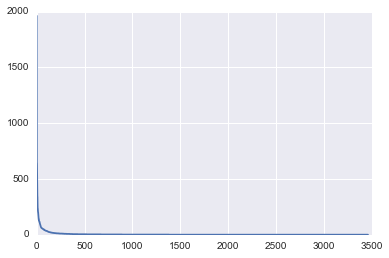

In [9]:
#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

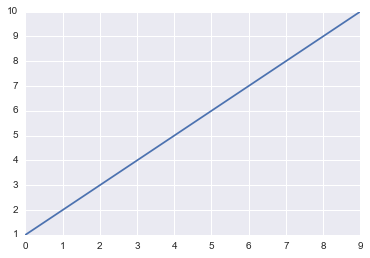

In [10]:
#Shiyu: plt.plot demostration
y= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(range(10), y)

This shows that likelihood of a word occurring is inversely proportional to its rank. This effect is called [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law), and suggests that the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency) resulting in a linear relationship.

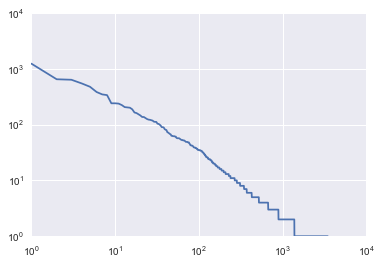

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

(The same relationship occurs in many other rankings, such as population ranks of cities, corporation sizes, income rankings, etc.) 

The distribution was imagined by Zipf to be driven by a principle of 'least effort' where speakers did not work any harder than necessary to communicate a given idea, but the basis for this relationship is still not well understood and conforms at least as well to a process of [preferential attachment](https://en.wikipedia.org/wiki/Preferential_attachment) whereby people disproportionately attend to popular words.

There are many other properties of words we can examine. First lets look surrounding words with the concordance. To do this we need to load the text into a `ConcordanceIndex`

In [12]:
print(len(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))) 
macbethIndex = nltk.text.ConcordanceIndex(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
print(macbethIndex)
#There are 23140 words in the meacbeth file; they are concordanceIndex"ed".

23140
<ConcordanceIndex for 23140 tokens (4017 types)>


Then we can retrieve all the words that cooccur with a word in a given word window. Let's first look at `'macbeth'`.

In [13]:
macbethIndex.print_concordance('macbeth')

No matches


Weird?! `'macbeth'` doesn't occur anywhere in the the text. What happened?

`ConcordanceIndex` is case sensitive, lets try looking for `'Macbeth'`

In [14]:
macbethIndex.print_concordance('Macbeth')

Displaying 25 of 61 matches:
                                  Macbeth by William Shakespeare 1603 ] Act
 the Heath 3 . There to meet with Macbeth 1 . I come , Gray - Malkin All . 
but all ' s too weake : For braue Macbeth ( well hee deserues that Name ) D
smay ' d not this our Captaines , Macbeth and Banquoh ? Cap . Yes , as Spar
, And with his former Title greet Macbeth Rosse . Ile see it done King . Wh
 King . What he hath lost , Noble Macbeth hath wonne . Exeunt . Scena Terti
ithin . 3 . A Drumme , a Drumme : Macbeth doth come All . The weyward Siste
, the Charme ' s wound vp . Enter Macbeth and Banquo . Macb . So foule and 
an : what are you ? 1 . All haile Macbeth , haile to thee Thane of Glamis 2
hee Thane of Glamis 2 . All haile Macbeth , haile to thee Thane of Cawdor 3
hee Thane of Cawdor 3 . All haile Macbeth , that shalt be King hereafter Ba
. Hayle 3 . Hayle 1 . Lesser than Macbeth , and greater 2 . Not so happy , 
hough thou be none : So all haile Macbeth , and Banquo 1 . 

That's better. What about something a lot less frequent?

In [15]:
print(countedWords[countedWords['word'] == 'donalbaine'])
macbethIndex.print_concordance('Donalbaine')

      count        word
2023      7  donalbaine
Displaying 7 of 7 matches:
m within . Enter King Malcome , Donalbaine , Lenox , with attendants , mee
Enter King , Lenox , Malcolme , Donalbaine , and Attendants . King . Is ex
rches . Enter King , Malcolme , Donalbaine , Banquo , Lenox , Macduff , Ro
 ' th ' second Chamber ? Lady . Donalbaine Mac . This is a sorry sight Lad
er , and Treason , Banquo , and Donalbaine : Malcolme awake , Shake off th
to brag of . Enter Malcolme and Donalbaine . Donal . What is amisse ? Macb
were subborned , Malcolme , and Donalbaine the Kings two Sonnes Are stolne


# Getting and working with raw text

First, we will retrieve a collection of press releases from a *GitHub API* that archived them, based on a number of analyses by Justin Grimmer, a political scientist whose work we will read next week, and who will be joining the University of Chicago next July!

GitHub API requests are made to `'https://api.github.com/'` and responses are in JSON, similar to Tumblr's API.

We will get the information on [github.com/lintool/GrimmerSenatePressReleases](https://github.com/lintool/GrimmerSenatePressReleases) as it contains a nice set documents.

In [16]:
r = requests.get('https://api.github.com/repos/lintool/GrimmerSenatePressReleases')
senateReleasesData = json.loads(r.text)
print(senateReleasesData.keys())
print()
print(senateReleasesData['description'])

dict_keys(['open_issues_count', 'hooks_url', 'svn_url', 'stargazers_url', 'tags_url', 'license', 'owner', 'url', 'watchers_count', 'full_name', 'contributors_url', 'git_tags_url', 'language', 'stargazers_count', 'updated_at', 'forks', 'releases_url', 'git_commits_url', 'labels_url', 'merges_url', 'fork', 'teams_url', 'assignees_url', 'languages_url', 'compare_url', 'comments_url', 'size', 'has_pages', 'id', 'archive_url', 'branches_url', 'keys_url', 'open_issues', 'git_refs_url', 'mirror_url', 'has_issues', 'downloads_url', 'notifications_url', 'commits_url', 'network_count', 'has_downloads', 'issues_url', 'git_url', 'clone_url', 'deployments_url', 'private', 'description', 'trees_url', 'pulls_url', 'collaborators_url', 'issue_events_url', 'html_url', 'default_branch', 'subscribers_url', 'blobs_url', 'contents_url', 'watchers', 'events_url', 'issue_comment_url', 'forks_count', 'forks_url', 'created_at', 'has_wiki', 'name', 'statuses_url', 'pushed_at', 'subscription_url', 'ssh_url', 'mi

What we are interested in here is the `'contents_url'`

In [17]:
print(senateReleasesData['contents_url'])

https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/{+path}


We can use this to get any or all of the files from the repo.

In [18]:
r = requests.get('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse')
whitehouseLinks = json.loads(r.text)
whitehouseLinks[0]

{'_links': {'git': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/git/blobs/f524289ee563dca58690c8d36c23dce5dbd9962a',
  'html': 'https://github.com/lintool/GrimmerSenatePressReleases/blob/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
  'self': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse/10Apr2007Whitehouse123.txt?ref=master'},
 'download_url': 'https://raw.githubusercontent.com/lintool/GrimmerSenatePressReleases/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
 'git_url': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/git/blobs/f524289ee563dca58690c8d36c23dce5dbd9962a',
 'html_url': 'https://github.com/lintool/GrimmerSenatePressReleases/blob/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
 'name': '10Apr2007Whitehouse123.txt',
 'path': 'raw/Whitehouse/10Apr2007Whitehouse123.txt',
 'sha': 'f524289ee563dca58690c8d36c23dce5dbd9962a',
 'size': 2206,
 'type': 'file',
 'url': 'https://api.github.com/r

Now we have a list of information about Whitehouse press releases. Let's look at one of them.

In [19]:
r = requests.get(whitehouseLinks[0]['download_url'])
whitehouseRelease = r.text
print(whitehouseRelease[:1000])
len(whitehouseRelease)

SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY IN PUSH FOR STEM CELL RESEARCH
  Sharing the story of Lila Barber, a 12 year old girl from Westerly, Sen. Sheldon Whitehouse (D-R.I.) on Tuesday, April 10, 2007, illustrated the hope stem cell research can offer in a speech on the Senate floor in favor of legislation to expand federal funding for stem cell research.  
   Whitehouse met Lila two weeks ago. She was diagnosed two years ago with osteosarcoma, a cancerous bone condition, and last year underwent cadaver bone transplant surgery. The procedure saved her leg and is helping her remain cancer-free, but the transplanted tissue will not grow with her and likely will break down over time. Stem cell research, Whitehouse explained, could vastly improve the care of patients like Lila by allowing surgeons to enhance transplants with a patient's own stem cells, which could replace the lost bone and cartilage, or grow entirely new replacement bones and joints. 
   "Stem cell research gives hope

2206

Now we have a string of correctly encoded text, similar to those we constructed from last week's assignment. For analysis of its words, next we need to tokenize it, or to split it into a sequence of tokens or word instances.

In [20]:
whTokens = nltk.word_tokenize(whitehouseRelease)
print(whTokens[10:30])
print(type(whTokens))

['STEM', 'CELL', 'RESEARCH', 'Sharing', 'the', 'story', 'of', 'Lila', 'Barber', ',', 'a', '12', 'year', 'old', 'girl', 'from', 'Westerly', ',', 'Sen.', 'Sheldon']
<class 'list'>


`whTokens` is a list of 'words' constructed from nltk's `word_tokenize` method built on the [Penn Treebank tokenizer](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.treebank). While it's better than `.split(' ')`, a general python string method that splits on whitespace, it is not perfect. There are many different ways to tokenize a string. `word_tokenize` is unfortunately unaware of sentences and is essentially a complicated regular expression (regex) run across the string.

If we want to find sentences we can use something like `nltk.sent_tokenize()`, which implements the [Punkt Sentence tokenizer](http://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.punkt.PunktSentenceTokenizer), a machine learning based algorithm that works well for many European languages.

We could also use the [Stanford tokenizer](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.stanford) or construct our own regex with [`RegexpTokenizer()`](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.regexp). Picking the correct tokenizer is important as the tokens form the base of our analysis.

For our purposes in this example, the Penn Treebank tokenizer is fine.

To use the list of tokens in `nltk`, and take advantage of functions like `concordance`, shown above, we can convert it into a `Text`.

In [21]:
whText = nltk.Text(whTokens)

whitehouseIndex = nltk.text.ConcordanceIndex(whText) 
whitehouseIndex.print_concordance('Whitehouse')

Displaying 5 of 5 matches:
rl from Westerly , Sen. Sheldon Whitehouse ( D-R.I. ) on Tuesday , April 1
unding for stem cell research . Whitehouse met Lila two weeks ago . She wa
ver time . Stem cell research , Whitehouse explained , could vastly improv
ch might help or even cure , '' Whitehouse said . Whitehouse also praised 
ven cure , '' Whitehouse said . Whitehouse also praised the efforts of Rho


*Note* that the `Text` class is for doing rapid, exploratory analysis. It provides an easy interface to many of the operations we want to do, but it does not allow us much control over the particular operations it glosses. When you are doing a more complete analysis, you should be using the module specifically designed for that task instead of the shortcut method `Text` provides, e.g. use  [`collocations` Module](http://www.nltk.org/api/nltk.html#module-nltk.collocations) instead of `.collocations()`.

Now that we have gotten this loaded, let's glance at few features we will delve into more deeply later.

For example, we can find words that statistically tend to occur together and typically have a composite, idiomatic meaning irreducible to the semantics of its component words. We will do this later with more control over exactly how these are identified.

In [22]:
whText.collocations()

Rhode Island; stem cells; cell research; Cell Enhancement; Enhancement
Act; President Bush; Stem Cell; stem cell; Stem cell


Or we can pick a word (or words) and find what words tend to occur around it.

In [23]:
whText.common_contexts(['stem'])

on_cells of_cell embryonic_cells the_cell for_cell ._cell own_cells
hope_cell ``_cell


We can also just count the number of times the word occurs.

In [24]:
whText.count('cell')

5


We can also plot each time a set of words occurs.

Dispersion plot: we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text.

397


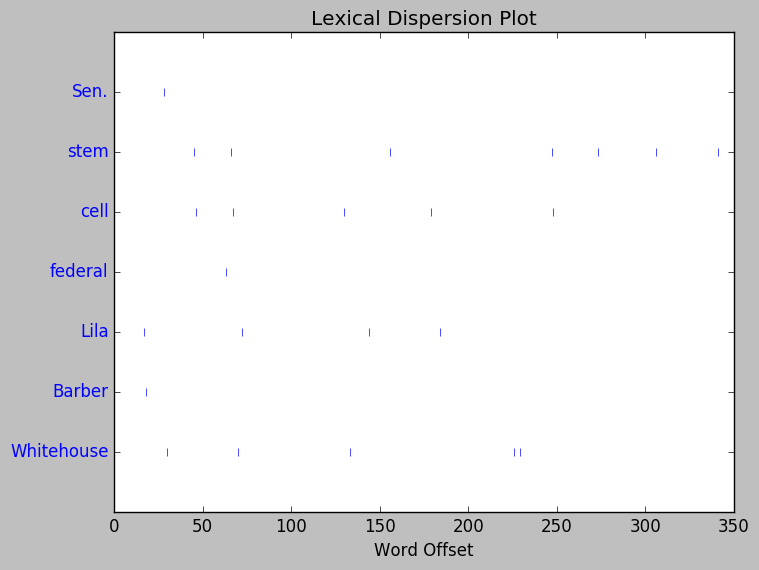

In [25]:
print(len(whText))
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['Sen.','stem', 'cell', 'federal' ,'Lila', 'Barber', 'Whitehouse'])
sns.set() #Re-enabling seaborn

If we want to do an analysis of all the Whitehouse press releases we will first need to obtain them. By looking at the API we can see the the URL we want is [https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse](https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse), so we can create a function to scrape the individual files.

If you want to know more about downloading from APIs, refer back to the 1st notebook.

In [26]:
def getGithubFiles(target, maxFiles = 100):
    #We are setting a max so our examples don't take too long to run
    #For converting to a DataFrame
    releasesDict = {
        'name' : [], #The name of the file
        'text' : [], #The text of the file, watch out for binary files
        'path' : [], #The path in the git repo to the file
        'html_url' : [], #The url to see the file on Github
        'download_url' : [], #The url to download the file
    }

    #Get the directory information from Github
    r = requests.get(target)
    filesLst = json.loads(r.text)

    for fileDict in filesLst[:maxFiles]:
        #These are provided by the directory
        releasesDict['name'].append(fileDict['name'])
        releasesDict['path'].append(fileDict['path'])
        releasesDict['html_url'].append(fileDict['html_url'])
        releasesDict['download_url'].append(fileDict['download_url'])

        #We need to download the text though
        text = requests.get(fileDict['download_url']).text
        releasesDict['text'].append(text)

    return pandas.DataFrame(releasesDict)

whReleases = getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse', maxFiles = 10)
whReleases[:5]

,download_url,html_url,name,path,text
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Whitehouse123.txt,raw/Whitehouse/10Apr2007Whitehouse123.txt,SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY I...
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Whitehouse2.txt,raw/Whitehouse/10Apr2008Whitehouse2.txt,SEN. WHITEHOUSE SAYS PRESIDENT BUSH MUST BEGIN...
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Whitehouse3.txt,raw/Whitehouse/10Apr2008Whitehouse3.txt,EPA MUST REVIEW LEGAL PROCESS TO ROOT OUT POLI...
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2007Whitehouse78.txt,raw/Whitehouse/10Aug2007Whitehouse78.txt,R.I. SENATORS PRAISE SEN. DENIAL OF LNG FACILI...
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Jan2008Whitehouse35.txt,raw/Whitehouse/10Jan2008Whitehouse35.txt,SEN. WHITEHOUSE COMMENTS ON ONE-YEAR ANNIVERSA...


If you are having trouble downloading the data uncomment this next cell

In [27]:
#whReleases = pandas.read_csv('../data/whReleases.csv')

Now we have all the texts in a DataFrame we can look at a few things.

First let's tokenize the texts with the same tokenizer as we used before. We will just save the tokens as a list for now; no need to convert to `Text`s.

In [28]:
whReleases['tokenized_text'] = whReleases['text'].apply(lambda x: nltk.word_tokenize(x))
#print(whReleases['tokenized_text'][0])

Now lets see how long each of the press releases is:

In [29]:
whReleases['word_counts'] = whReleases['tokenized_text'].apply(lambda x: len(x))
whReleases['word_counts']

0    397
1    344
2    553
3    216
4    257
5    380
6    270
7    521
8    484
9    482
Name: word_counts, dtype: int64

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [30]:
import os
import jieba
import jieba.posseg as pseg

In [4]:
week2= '/Users/ShiyuZhang/Documents/SourceTree/Content-Analysis/2-Corpus-Linguistics'
os.chdir(week2)
os.chdir("..")
bookDF_male= pd.read_pickle("bookDF_male.pickle")
bookDF_female= pd.read_pickle("bookDF_female.pickle")
os.chdir(week2)

In [5]:
def tokenize_ch(thirty_ch):
    #Take the 30-chapter dictionary as input
    #Tokenize the 30 chapters separately and output a list of 30 tokenized word lists (list of list)
    thirty_ch_list= []
    for ch in thirty_ch.keys():
        ch_list= jieba.lcut(thirty_ch[ch], cut_all= False)
        thirty_ch_list+= [ch_list]
    return thirty_ch_list

book0_example= bookDF_male["example_text"].iloc[0] #This is the 30 chapters of the first book
#Using jieba to tokenize this chapter, returns  30 lists nesting in one list, take the first chapter
book0_ch1= tokenize_ch(book0_example)[0] 
#print(book0_ch1)

#Output word count data frame & sort it
book0_ch1_wordDF= wordCounter(book0_ch1).sort_values("count", ascending= False)
book0_ch1_wordDF[:10]

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/86/kbyspkys411_n8krrz1xl9cc0000gn/T/jieba.cache
Loading model cost 1.231 seconds.
Prefix dict has been built succesfully.


,count,word
283,268,，
620,91,的
59,54,。
221,53,了
245,31,白小纯
30,25,”
276,25,“
602,24,他
81,23,在
362,22,是


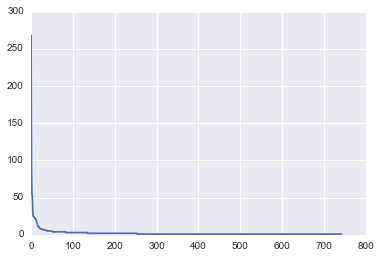

In [25]:
#Plot demonstrating the Zipf's law
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(book0_ch1_wordDF.shape[0]), book0_ch1_wordDF['count'])
plt.show()

In [26]:
#Change the word list into nltk text
book0_ch1_text = nltk.Text(book0_ch1)

book0_ch1_ConIndex = nltk.text.ConcordanceIndex(book0_ch1_text) 
book0_ch1_ConIndex.print_concordance("仙人") #The sentences that 仙人 embedded in 
print()
book0_ch1_text.common_contexts(["仙人"]) #Common context of 仙人

print(book0_ch1_text.collocations()) #Could not find any collocation


Displaying 15 of 15 matches:
是 个 … … 好孩子 ！ ！ 难道 你 不想 长生 了 么 ， 成为 仙人 就 可以 长生 ， 能活 的 很久很久 ， 走 吧 ， 雏鹰 长大 ，
 他 终于 … … 终于 走 了 ， 是 谁 告诉 他 在 附近 看到 仙人 的 ， 你 为 村子 立下 了 大功 ！ ” “ 这 白鼠 狼 终于 
， 他前 几天 在 这里 被 一头 野猪 追赶 时 ， 看到 天上 有 仙人 飞过 … … ” 白小纯 走 在 山路 上 ， 心脏 怦怦 跳动 时 
 斧头 ， 有 柴刀 ， 手里 的 香 还 可以 召唤 天雷 ， 能引 仙人 降临 ， 你 敢 出来 ， 就 劈 死 你 ！ ” 白小纯 哆嗦 的 
 留给 他 的 ， 据说 是 祖上 曾 偶然 的 救下 一个 落魄 的 仙人 ， 那 仙人 离去 时 留下 这根 香 作为 报答 ， 曾言会 收下 
 ， 据说 是 祖上 曾 偶然 的 救下 一个 落魄 的 仙人 ， 那 仙人 离去 时 留下 这根 香 作为 报答 ， 曾言会 收下 白家 血脉 一
报答 ， 曾言会 收下 白家 血脉 一 人为 弟子 ， 只要 点燃 ， 仙人 就 会 到来 。 可 至今 为止 ， 这根 香 他 点 过 十多次 ，
 。 可 至今 为止 ， 这根 香 他 点 过 十多次 ， 始终 不见 仙人 到来 ， 让 白小纯 开始 怀疑 仙人 是不是 真的 会 来 ， 这 
点 过 十多次 ， 始终 不见 仙人 到来 ， 让 白小纯 开始 怀疑 仙人 是不是 真的 会 来 ， 这 一次 之所以 下定决心 ， 一方面 是 
另一方面 是 他 听 村子 里 人 说 ， 头 几天 在 这 看到 有 仙人 从 天上 飞过 。 所以 他 这 才 到来 ， 想着 距离 仙人 近 
 有 仙人 从 天上 飞过 。 所以 他 这 才 到来 ， 想着 距离 仙人 近 一些 ， 或许 仙人 就 察觉到 了 也 说不定 。 踌躇 一番 
 。 所以 他 这 才 到来 ， 想着 距离 仙人 近 一些 ， 或许 仙人 就 察觉到 了 也 说不定 。 踌躇 一番 ， 白小纯 咬牙 继续 ，
 这次 ， 点 了 十二次 ， 每次 都 是 这样 的 雷鸣 闪电 ， 仙人 也 没有 到来 ， 吓 的 本 就 怕死 的 他 每次 都 吐口

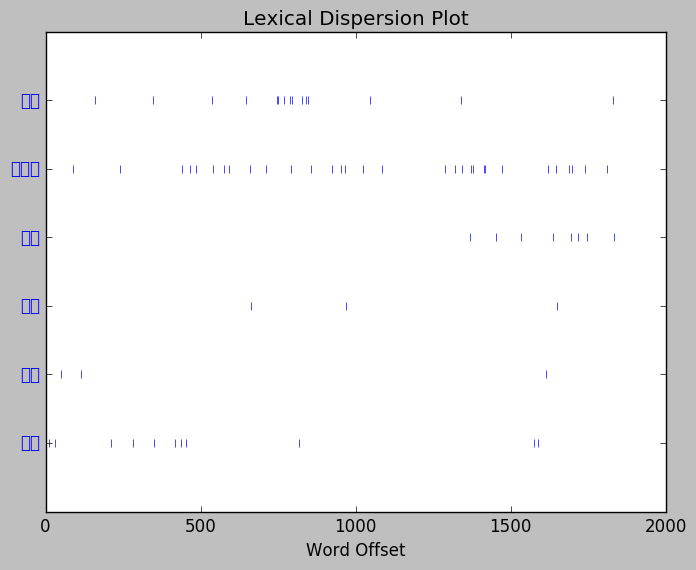

In [95]:
#Dispersion plot 
                 
sns.reset_orig() 
book0_ch1_text.dispersion_plot(['仙人','白小纯', '修士', '哆嗦' ,'乖巧', '村子'])
sns.set() 
#Could not display Chinese in the plot with nltk's plot function
#the 修士 （“friar”） and 村子 （village） actually reveals interesting information:
#In this chapter, the main characters leaves the village he grew up in and starts 
#his path as a "friar" 

In [11]:
"""Irrelevant to this Exercise (but a preparation step for the next)"""
##Tokenize the book chapters. For each chapter (of each book), present under the column "ch?_token"
row_DF_500= pd.DataFrame()
for i in range(bookDF_male.shape[0]):
    #Using the tokenize_ch() function defined above
    book_ch_list= tokenize_ch(bookDF_male["example_text"].iloc[i])
    row_DF= pd.DataFrame()
    for i in range(30):
        row_DF["ch"+str(i+1)+"_token"]= [book_ch_list[i]]
    row_DF_500= pd.concat([row_DF_500, row_DF], axis= 0)
print(row_DF_500.shape)


#Creating a new dataframe
#So as not save any thing to over-write the original data
bookDF_male_tokenized= pd.concat([bookDF_male, row_DF_500], axis= 1)
print(bookDF_male_tokenized.shape)

##Tokenize the book introduction and add a column called "intro_token"
bookDF_male_tokenized["intro_token"]= bookDF_male["intro"].apply(lambda x: jieba.lcut(x))
#bookDF_male["intro_token"]

(500, 30)
(500, 42)


In [12]:
def pos_cut(a_string):
    word_tag_list= []
    words_poscut= pseg.cut(a_string)
    for word, tag in words_poscut:
        word_tag_list+= [(word, tag)]
    return word_tag_list
    
bookDF_male_tokenized["intro_tag"]= bookDF_male_tokenized["intro"].apply(lambda x: pos_cut(x))


#This takes really long time... 
row_tagDF_500= pd.DataFrame()
for i in range(bookDF_male_tokenized.shape[0]):
    a_book= bookDF_male_tokenized["example_text"].iloc[i]   
    row_tagDF= pd.DataFrame()
    for j in range(30):
        row_tagDF["ch"+str(j+1)+"_tag"]= [pos_cut(a_book[j+1])]
    row_tagDF_500= pd.concat([row_tagDF_500, row_tagDF], axis= 0)
print(row_tagDF_500.shape)


(500, 30)


In [13]:
#Sum the columns all up
week2= '/Users/ShiyuZhang/Documents/SourceTree/Content-Analysis/2-Corpus-Linguistics'
os.chdir(week2)
os.chdir("..")
bookDF_male= pd.read_pickle("bookDF_male.pickle")
bookDF_female= pd.read_pickle("bookDF_female.pickle")
os.chdir(week2)


bookDF_male_tokenized= pd.concat([bookDF_male, 
                                  bookDF_male_tokenized["intro_token"], row_DF_500,
                                  bookDF_male_tokenized["intro_tag"], row_tagDF_500], axis= 1)
bookDF_male_tokenized.shape

(500, 74)

In [14]:
bookDF_male_tokenized.to_pickle("bookDF_male_tokenized.pickle")

# Filtering and normalizing text

As we want to start comparing the different releases we may choose to do a bit of filtering and normalizing that will allow us to focus on what we most care about. We can first make all of the words lower case, then drop the non-word tokens. Next, we can remove some 'stop words', stem the remaining words to remove suffixes, prefixes and (in some languages) infixes, or lemmatize tokens by intelligently grouping inflected or variant forms of the same word (e.g., with a stemmer and a dictionary). 

To begin this process, we will first define a function to work over the tokenized lists, then another to add normalized tokens to a new column.

Nltk has a built-in list of stopwords. They are already imported in the import section. Let's first take a look at what they are.

In [79]:
print(', '.join(stopwords.words('english')))

i, me, my, myself, we, our, ours, ourselves, you, your, yours, yourself, yourselves, he, him, his, himself, she, her, hers, herself, it, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, should, now, d, ll, m, o, re, ve, y, ain, aren, couldn, didn, doesn, hadn, hasn, haven, isn, ma, mightn, mustn, needn, shan, shouldn, wasn, weren, won, wouldn


We can remove these stopwords from the analysis by fiat, but we could also take a more principled approach by looking at the frequency distribution of words and selecting a specific cut-off associated with the preservation of 'meaningful words' identified upon inspection. Alternatively, we could automatically set a cut-off by rule, such as removal of all words more frequent then the most frequent verb, or the most frequent noun (not pronoun), or some term of central interest. 

Lets generate our own stop list now.

In [80]:
countsDict = {}
for word in whReleases['tokenized_text'].sum(): #This .sum() turns a dataframe column to a list
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('the', 179),
 (',', 173),
 ('.', 136),
 ('to', 112),
 ('of', 112),
 ('and', 108),
 ('in', 64),
 ('a', 61),
 ("'s", 50),
 ('that', 41),
 ('our', 39),
 ('for', 35),
 ('is', 33),
 ('on', 33),
 ('Whitehouse', 31),
 ('``', 30),
 ('Iraq', 28),
 ('Bush', 27),
 ('President', 25),
 (')', 24)]

We can look at this and pick the cutoff, usually it is at the first noun. So we will cut all words before `'Whitehouse'`.

In [81]:
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'Whitehouse':
        break
    else:
        stop_words_freq.append(word)
print(stop_words_freq)
wordnet = nltk.stem.WordNetLemmatizer()
wordnet.lemmatize('are')

['the', ',', '.', 'to', 'of', 'and', 'in', 'a', "'s", 'that', 'our', 'for', 'is', 'on']


'are'

Now we can create our function to normalize the tokens

In [33]:
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter .PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english') #I can try this: nltk.snowball.demo()
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha()) #.isalpha = is alphabetical?

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

whReleases['normalized_tokens'] = whReleases['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

whReleases['normalized_tokens_count'] = whReleases['normalized_tokens'].apply(lambda x: len(x))

whReleases[:2]

,download_url,html_url,name,path,text,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Whitehouse123.txt,raw/Whitehouse/10Apr2007Whitehouse123.txt,SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY I...,"[SEN., WHITEHOUSE, SHARES, WESTERLY, GIRL, 'S,...",397,"[whitehous, share, westerli, girl, stori, push...",231
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Whitehouse2.txt,raw/Whitehouse/10Apr2008Whitehouse2.txt,SEN. WHITEHOUSE SAYS PRESIDENT BUSH MUST BEGIN...,"[SEN., WHITEHOUSE, SAYS, PRESIDENT, BUSH, MUST...",344,"[whitehous, say, presid, bush, must, begin, br...",171


The stemmer we use here is called the [Porter Stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter), there are many others, including another good one by the same person (Martin Porter) called the [Snowball Stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.snowball) or 'another stemmer' called the [Lancaster Stemmer](http://www.nltk.org/_modules/nltk/stem/lancaster.html). We can also normalize our words by lemmatizing them, or matching word variants or inflected forms to a common morpheme in a dictionary like [WordNet](https://wordnet.princeton.edu) through intelligent stemming rules. (The WordNet function `morphy` returns the given word if it cannot be matched to a word in the dictionary).

Now that it is cleaned we start analyzing the dataset. We can start by finding frequency distributions for the dataset. Lets start looking at all the press releases together. The [`ConditionalFreqDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) class reads in an iterable of tuples, the first element is the condition and the second the focal word. For starters, we will use word lengths as the conditions, but tags or clusters will provide more useful results.

In [83]:
#.sum() adds together the lists from each row into a single list
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in whReleases['normalized_tokens'].sum()))
print(whcfdist)
#print the number of words
print(whcfdist.N())
print(whcfdist.conditions())

print('''--------------我是分割线-------------''')

"""Shiyu: For understanding the code above"""
len_possibility= []
for w in whReleases['normalized_tokens'].sum():
    if len(w) not in len_possibility:
        len_possibility+= [len(w)]
print(len_possibility)
print(len(len_possibility))

"""The reason why the above freqency distribution prints a <ConditionalFreqDist with 12 conditions>
is becuase there are in totoal 12 word-length possibilities. Each word length is a condition."""


<ConditionalFreqDist with 12 conditions>
2038
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
--------------我是分割线-------------
[9, 5, 8, 4, 6, 3, 7, 2, 12, 10, 11, 13]
12


'The reason why the above freqency distribution prints a <ConditionalFreqDist with 12 conditions>\nis becuase there are in totoal 12 word-length possibilities. Each word length is a condition.'

From this we can lookup the distributions of different word lengths

<FreqDist with 44 samples and 131 outcomes>


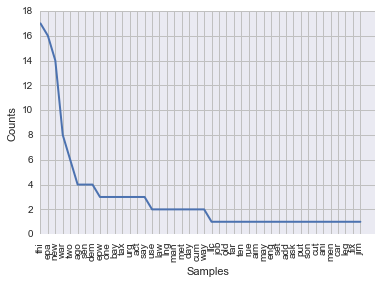

In [84]:
print(whcfdist[3])
whcfdist[3].plot()

See that the most frequent 3-character word is "thi". But what is "thi"? It is actually "this" stemmed by the Porter Stemmer. 

In [85]:
porter = nltk.stem.porter.PorterStemmer()
print (porter.stem('this'))

thi


Let's try with the Snowball Stemer. See that "this" is corretly stemmed as a 4-character word. 

this
[(2, FreqDist({'us': 5, 'su': 1, 'de': 1})), (3, FreqDist({'epa': 16, 'new': 14, 'war': 8, 'two': 6, 'ago': 4, 'sen': 4, 'dem': 4, 'epw': 3, 'one': 3, 'bay': 3, ...})), (4, FreqDist({'iraq': 32, 'bush': 30, 'year': 16, 'said': 16, 'home': 13, 'cell': 12, 'stem': 12, 'also': 11, 'time': 9, 'work': 8, ...})), (5, FreqDist({'senat': 28, 'troop': 24, 'rhode': 20, 'today': 15, 'state': 13, 'would': 11, 'decis': 10, 'bring': 9, 'peopl': 9, 'polit': 8, ...})), (6, FreqDist({'presid': 30, 'island': 20, 'provid': 14, 'member': 13, 'nation': 13, 'consul': 12, 'servic': 8, 'offici': 8, 'health': 7, 'direct': 6, ...})), (7, FreqDist({'sheldon': 12, 'student': 9, 'concern': 8, 'countri': 7, 'america': 6, 'general': 6, 'billion': 5, 'announc': 5, 'johnson': 5, 'continu': 5, ...})), (8, FreqDist({'american': 22, 'research': 9, 'committe': 8, 'redeploy': 6, 'question': 5, 'signific': 5, 'thousand': 4, 'petraeus': 4, 'intellig': 3, 'consular': 3, ...})), (9, FreqDist({'whitehous': 40, 'administr':

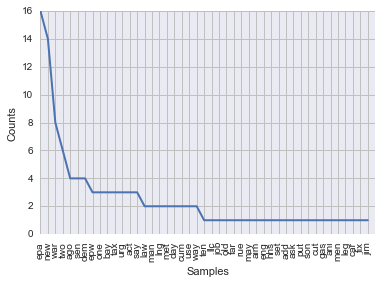

In [86]:
print (snowball.stem('this'))

whReleases['normalized_tokens'] = whReleases['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))
whReleases['normalized_tokens_count'] = whReleases['normalized_tokens'].apply(lambda x: len(x))
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in whReleases['normalized_tokens'].sum()))
print(list(whcfdist.items()))

print()

print(whcfdist[3])
whcfdist[3].plot()

We can also create a Conditional Probability Distribution or [`ConditionalProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) from the `ConditionalFreqDist`. To do this, however, we need a model for the probability distribution. A simple model is [`ELEProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ELEProbDist) which gives the expected likelihood estimate for the probability distribution of the experiment used to generate the observed frequency distribution. 

In [87]:
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(whcfdist[2].max())
print(whcpdist[2].max())

#And its probability
print(whcpdist[2].prob(whcpdist[2].max()))

"""Shiyu: For understanding the codes above"""
print(whcpdist[2].samples()) #There are three 2-letter words

p_total= 0

for s in whcpdist[2].samples():
    print(whcpdist[2].prob(s))
    p_total+= whcpdist[2].prob(s)

print(p_total)

"""conditional probability: There are 3 two-letter words (us, su, & de)
within this condition-- two-letter word, the porbability of us is .647, the probability of su is .176,
and the probability of de is .176. They sum up to 1."""

us
us
0.6470588235294118
dict_keys(['su', 'us', 'de'])
0.17647058823529413
0.6470588235294118
0.17647058823529413
1.0


'conditional probability: There are 3 two-letter words (us, su, & de)\nwithin this condition-- two-letter word, the porbability of us is .647, the probability of su is .176,\nand the probability of de is .176. They sum up to 1.'

Length is one feature of a word, but there are many more important features we care about. Another critical feature is a word's role in the sentence, or its part of speech (POS). Here, we will be classifying words according to their part of speech (POS), using the [`nltk.pos_tag()`](http://www.nltk.org/api/nltk.tag.html#nltk.tag.pos_tag). The tags used here are those from the [Brown Corpus tagset](http://www.scs.leeds.ac.uk/amalgam/tagsets/brown.html).

In [88]:
whReleases['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in whReleases['normalized_tokens']]

This gives us a new column with the part of speech as a short initialism and the word in a tuple, exactly how the `nltk.ConditionalFreqDist()` function wants them. We can now construct another conditional frequency distribution.

In [89]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(whReleases['normalized_tokens_POS'].sum())
list(whcfdist_WordtoPOS.items())[:10]

[('pose', FreqDist({'VB': 1})),
 ('job', FreqDist({'NN': 1})),
 ('civil', FreqDist({'JJ': 1})),
 ('heard', FreqDist({'NN': 1, 'RB': 1})),
 ('jersey', FreqDist({'NN': 1})),
 ('share', FreqDist({'NN': 4})),
 ('four', FreqDist({'CD': 1})),
 ('accord', FreqDist({'NN': 1})),
 ('merit', FreqDist({'NN': 2})),
 ('girl', FreqDist({'NN': 2}))]

This gives the frequency of each word as each part of speech...which can be uninformative and boring.

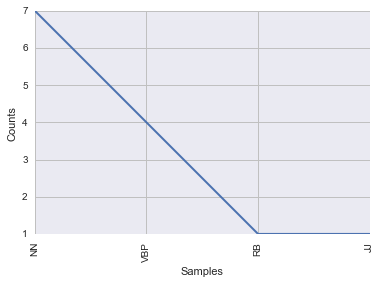

In [90]:
whcfdist_WordtoPOS['administr'].plot()

What we want is the converse; the frequency of each part of speech for each word.

In [91]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in whReleases['normalized_tokens_POS'].sum())

We can now identify and collect all of the superlative adjectives

In [92]:
whcfdist_POStoWord['JJS']

FreqDist({'best': 1, 'strongest': 2})

Or look at the most common nouns

In [93]:
whcfdist_POStoWord['NN'].most_common(5)

[('bush', 24), ('presid', 23), ('iraq', 22), ('rhode', 18), ('island', 18)]

Or plot the base form verbs against their number of occurrences

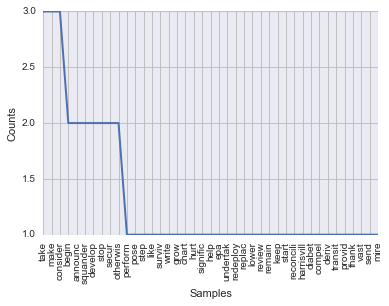

In [94]:
whcfdist_POStoWord['VB'].plot()

We can then do a similar analysis of the word probabilities

In [95]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(whcpdist_POStoWord['NN'].max())

#And its probability
print(whcpdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

bush
0.01786365293474298


We can even create a...wait for it...*WORD CLOUD* or Wordl to gaze at and draw mystical, approximate inferences about important nouns and verbs in our corpus:

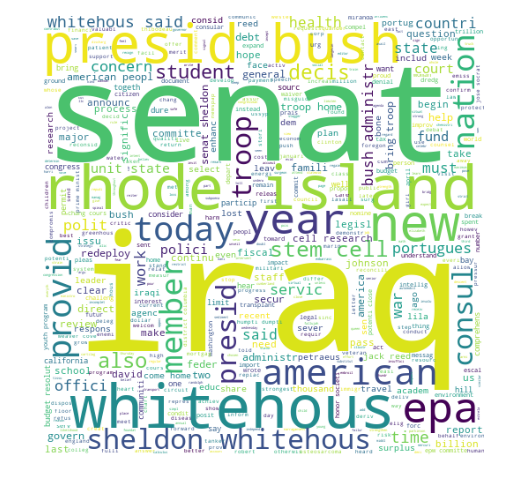

In [132]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(whReleases['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("whitehouse_word_cloud.pdf", format = 'pdf')

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

In [17]:
#Chinese does not need stemming and lemmatizing, so I will obmit these two steps. 

##I found a list of Chinese stop words online and download it.
fr= open("Chinese_stop_words.txt", encoding= "utf-8")  
stopw_ch= fr.read().split()
fr.close()
print(stopw_ch)
print(len(stopw_ch))

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一则', '一方面', '一旦', '一来', '一样', '一般', '万一', '上', '上下', '下', '不', '不仅', '不但', '不光', '不单', '不只', '不外乎', '不如', '不妨', '不尽', '不尽然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不独', '不管', '不至于', '不若', '不论', '不过', '不问', '与', '与其', '与其说', '与否', '与此同时', '且', '且不说', '且说', '两者', '个', '个别', '临', '为', '为了', '为什么', '为何', '为止', '为此', '为着', '乃', '乃至', '乃至于', '么', '之', '之一', '之所以', '之类', '乌乎', '乎', '乘', '也', '也好', '也罢', '了', '二来', '于', '于是', '于是乎', '云云', '云尔', '些', '亦', '人', '人们', '人家', '什么', '什么样', '今', '介于', '仍', '仍旧', '从', '从此', '从而', '他人', '以', '以上', '以为', '以便', '以免', '以及', '以故', '以期', '以来', '以至', '以至于', '以致', '们', '任', '任何', '任凭', '似的', '但', '但凡', '但是', '何', '何以', '何况', '何处', '何时', '余外', '作为', '你', '你们', '使', '使得', '例如', '依', '依据', '依照', '便于', '俺', '俺们', '倘', '倘使', '倘或', '倘然', '倘若', '借', '假使', '假如', '假若', '傥然', '像', '儿', '先不先', '光是', '全体', '全部', '兮', '关于', '其', '其一', '其中

In [46]:
##I rely on the book introductions to find more stop words. 
##If the POS cannot identify the element and tags it as "x", it is my stop word
## The ones that are signs:
stopw_x= []
for w, t in bookDF_male_tokenized["intro_tag"].sum():
    if t== "x" and (w not in stopw_x):
        stopw_x+= [w]
print(stopw_x)

## Manually detect the most common words that are obviously irrelevants:
fdist_tag_word = nltk.ConditionalFreqDist((t, w) for w, t in bookDF_male_tokenized['intro_tag'].sum())
print("the 50 most common a:", "\n", fdist_tag_word["a"].most_common(50))
print()
print("the 50 most common an:", "\n", fdist_tag_word["an"].most_common(50))
print()
print("the 50 most common ad:", "\n", fdist_tag_word["ad"].most_common(50))
print()
print("the 50 most common ag:", "\n", fdist_tag_word["ag"].most_common(50))
print()
print("the 50 most common n:", "\n", fdist_tag_word["n"].most_common(50))

stopw_manual= ['完本', '书号', '群号', '新书', '书友', '小说', '作品', '读者群', '读者', '大家'
              '时候', '书']
            #These are the ones that are related to the novel context but not to the content




['，', '。', ' ', '…', '《', '》', '！', '？', '‘', '’', '、', '：', ':', '２', '（', '）', '—', '*', '；', '“', '”', '\r', '!', '?', ',', '=', '【', '】', '~', 'V', '％', '-', 'ｃ', 'X', 'ｅ', '^', '_', '<', 'a', '"', '/', '#', '>', 'Ｐ', 'Ｓ', '＜', '＞', '+', '%', '～', '.', '##########', '[', ']', '＝', '·', 'ㄟ', '(', '▔', ')', 'ㄏ', '－', '2', 'ｍ', '@', '８', '６', '０', 'の', '剣', 'を', '喰', 'ら', 'え', '啾', '|', '▍', '1', '╰', '☆', '＋', '∽', '\xa0', '3', '0', '&#', '�', '╄', '\\', 'Ⅱ', 'u', '①', '②', '③', '④', '．', 'Ｙ', '{', '}', '###########################', '4', '6', '7', '8', 'A', 'B', '&', '┃', 'ゞ', '「', '」', '狷', '→', ';', '※', '+++++++++++++++++++++++++++++++++++++++++++++++', '∝', '灞', '＊', 'Ｑ', '+++++++++++++++++++++++++++++++++++++']
the 50 most common a: 
 [('大', 75), ('满', 65), ('神秘', 40), ('好', 32), ('新', 32), ('小', 32), ('强大', 31), ('意外', 27), ('完本', 26), ('神奇', 22), ('最强', 15), ('全', 15), ('平凡', 15), ('充满', 14), ('邪', 13), ('混乱', 12), ('老', 12), ('高', 12), ('不同', 12), ('完美', 12), ('疯狂', 11), ('恐

In [334]:
"""May be deleted block
The codes above asks me to look for stop words from the most frequent words
But this approach does not work well for me.
There so many words in my datasets. It is not clear where the cutoff point should be.
"""

##I combine all texts (book introduction & book chapters)
all_word= []
all_word+= bookDF_male_tokenized["intro_token"].sum()
for i in range(30):
    all_word+= bookDF_male_tokenized["ch"+str(i+1)+"_token"].sum()
    
##Look for the stop words that are not already included in the stop word list.

#There are reasons why I write the code like this (in two steps):
#I.e., counting all words' frequency first and then removing the stop words from the dictionary
#It is way faster this way. Looking up a key in dictionary is FAST, whereas looking up an item in list is SLOW.
#The all_word has 26909880 items. If I see if each of it is in the stop word list, then it takes veryyyyy long. 
count_dic= {}
for w in all_word:
    if w not in count_dic:
        count_dic[w]= 1
    else:
        count_dic[w]+= 1
print(len(count_dic))

keys= list(count_dic.keys())
for key in keys:
    if key in stopw_ch:
        del count_dic[key]
print(len(count_dic))

342266
341596


In [523]:
word_count = sorted(count_dic.items(), key = lambda x : x[1], reverse = True)
print(word_count[:100])
#What are the things that can definitely be added to the stop word list? Difficult to judge...
#I do not want to use the rank and get rid of the frequent ones 
#becuase I am not sure if these will be useful later..
#I decide to do it manually instead.

#'她' occurs 49689 times, but '他' occurs 247430 times! That's 5 times more. 

more_stopw= ['…', '—', '*', ' ', '-', '~', '【', '】', '‘', '(', ')', '（', '）', '－', '＝',
            '一个', '已经', '中', '会', '里', '便', '之后', '不会', '倒', '带', '里面']
stopw_ch+= more_stopw
print(len(stopw_ch))

[('他', 247430), ('…', 159033), ('一个', 90227), ('没有', 78102), ('说', 74975), ('道', 70983), ('已经', 51672), ('知道', 50670), ('她', 49689), ('中', 47516), ('会', 44402), ('他们', 43520), ('—', 42320), ('现在', 36523), ('没', 36481), ('里', 35117), ('想', 33609), ('起来', 31623), ('*', 29952), ('走', 29001), (' ', 26232), ('-', 25856), ('看着', 25818), ('说道', 24531), ('一下', 24200), ('看到', 23510), ('做', 23467), ('出', 21440), ('便', 20546), ('之后', 20498), ('不会', 20441), ('东西', 20047), ('这种', 20008), ('一声', 19449), ('事情', 18550), ('感觉', 18547), ('可能', 17993), ('最', 17446), ('吃', 17174), ('时间', 17060), ('更', 17038), ('两个', 16507), ('心中', 16060), ('不能', 16052), ('－', 15808), ('听', 15733), ('觉得', 15621), ('笑', 15581), ('身体', 15328), ('时', 15008), ('过来', 14986), ('身上', 14336), ('突然', 14100), ('倒', 14051), ('发现', 13915), ('站', 13779), ('能够', 13544), ('似乎', 13504), ('带', 13478), ('竟然', 13458), ('点', 13444), ('‘', 13391), ('几个', 13362), ('应该', 13333), ('声音', 13292), ('找', 13105), ('直接', 13065), ('’', 13064), ('今天', 13

In [51]:
##Combining three list of stopwords 
##download+ xtag+ manually detected a few
stopw_total= list(set(stopw_ch+ stopw_x+ stopw_manual))

In [38]:
#Removing the stop words from the text
def remove_stopw(wordlist, stopw):
    cleaned_list= []
    for w in wordlist:
        if w not in stopw:
            cleaned_list+= [w]
    return cleaned_list

In [41]:
bookDF_male_tokenized["intro_clean"]= \
bookDF_male_tokenized["intro_token"].apply(lambda x: remove_stopw(x, stopw_total))
#bookDF_male_tokenized["intro_clean"]

In [52]:
for i in range(30):
    bookDF_male_tokenized["ch"+ str(i+1)+ "_clean"]=\
    bookDF_male_tokenized["ch"+ str(i+1)+ "_token"].apply(lambda x: remove_stopw(x, stopw_total))

In [91]:
bookDF_male_tokenized.to_pickle("bookDF_male_tokenized.pickle")

<FreqDist with 41 samples and 56 outcomes>
dict_items([('篇', 1), ('聊', 1), ('记', 1), ('兽', 1), ('号', 2), ('犬', 1), ('路', 2), ('系', 1), ('年', 1), ('妖', 1), ('群', 7), ('面', 1), ('雀', 1), ('变', 1), ('主', 1), ('万', 2), ('王', 1), ('中', 2), ('龙', 1), ('传', 3), ('敌', 1), ('魂', 1), ('领', 1), ('继', 2), ('位', 1), ('吾', 1), ('他', 1), ('时', 1), ('爹', 1), ('念', 1), ('航', 1), ('天', 3), ('诛', 1), ('道', 1), ('砍', 1), ('欲', 1), ('府', 1), ('降', 1), ('落', 1), ('闯', 1), ('需', 1)])


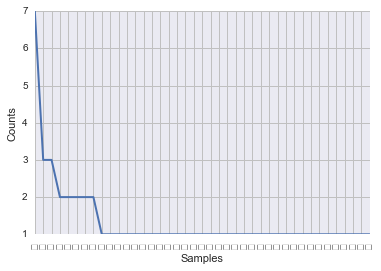

In [53]:
#Conditiioned on word length
##Take the first 5 books to fit a plot
all_intro_words= bookDF_male_tokenized["intro_clean"].iloc[:10].sum()

fdist1 = nltk.ConditionalFreqDist((len(w), w) for w in all_intro_words)
print(fdist1[1])
print(fdist1[1].items())

fdist1[1].plot() #I couldn't fit Chinese in the plot...

In [58]:
#Above: cleaning were for cleaning the word list, [w1, w2, w3 ...]. 
#Below: it is cleaning the list of tag columns [(w1, t1), (w2, t2), ...]
#Using the tags to remove stop words. Everything that is taged as x are removed.

def remove_stop_tag(a_list_word_tag, stopw):
    clean_list= []
    for w, t in a_list_word_tag:
        if w not in stopw:
            clean_list+= [(w, t)]
    return clean_list

bookDF_male_tokenized["intro_tag_clean"]= bookDF_male_tokenized["intro_tag"].apply(lambda x: remove_stop_tag(x, stopw_total))

for i in range(30):
    bookDF_male_tokenized["ch"+str(i+1)+"_tag_clean"]= \
    bookDF_male_tokenized["ch"+str(i+1)+"_tag"].apply(lambda x: remove_stop_tag(x, stopw_total))

the 30 most common adjective: 
 [('满', 65), ('神秘', 40), ('新', 32), ('强大', 31), ('意外', 27), ('神奇', 22), ('最强', 15), ('全', 15), ('平凡', 15), ('充满', 14), ('邪', 13), ('混乱', 12), ('老', 12), ('高', 12), ('不同', 12), ('完美', 12), ('疯狂', 11), ('恐怖', 11), ('诡异', 10), ('自由', 10), ('重新', 10), ('成功', 10), ('微', 9), ('最好', 9), ('快', 9), ('辉煌', 9), ('巨大', 9), ('最高', 9), ('逍遥', 9), ('浩瀚', 8)]

the 30 most common adjective-noun: 
 [('痛苦', 6), ('猥琐', 5), ('危险', 4), ('恐惧', 3), ('麻烦', 3), ('矛盾', 2), ('困难', 2), ('凶险', 2), ('温暖', 2), ('安全', 1), ('狼狈', 1), ('恐慌', 1)]

the 30 most common adverb: 
 [('完全', 10), ('突然', 10), ('正式', 8), ('努力', 8), ('直接', 7), ('彻底', 4), ('认真', 3), ('顺便', 3), ('积极', 3), ('正确', 1), ('踊跃', 1), ('大开', 1), ('顺利', 1), ('仔细', 1), ('顺心', 1), ('积善', 1), ('坚决', 1), ('普', 1), ('严格', 1), ('充分', 1)]

the 30 most common noun: 
 [('世界', 205), ('群', 188), ('故事', 92), ('时代', 59), ('人类', 54), ('重生', 50), ('人生', 49), ('历史', 45), ('大陆', 44), ('游戏', 40), ('传奇', 37), ('天才', 37), ('传说', 36), ('路', 36), ('神

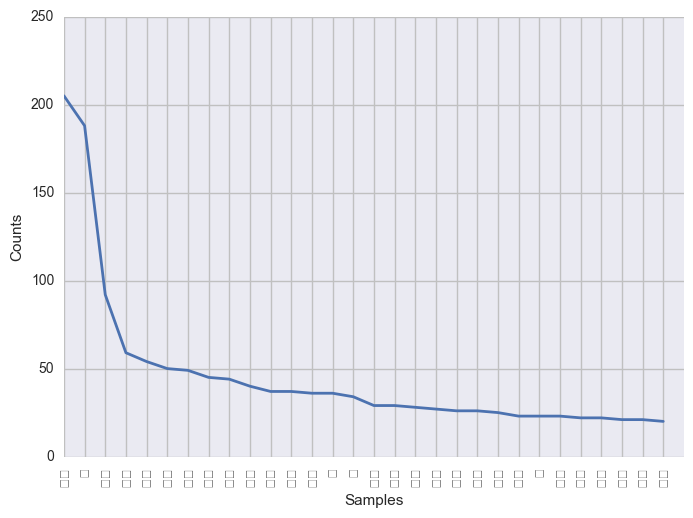

In [106]:
#For the exercies. Conditional Frequency.
fdist_tag_word = nltk.ConditionalFreqDist((t, w) for w, t in bookDF_male_tokenized['intro_tag_clean'].sum())
print("the 30 most common adjective:", "\n", fdist_tag_word["a"].most_common(30))
print()
print("the 30 most common adjective-noun:", "\n", fdist_tag_word["an"].most_common(30))
print()
print("the 30 most common adverb:", "\n", fdist_tag_word["ad"].most_common(30))
print()
print("the 30 most common noun:", "\n", fdist_tag_word["n"].most_common(30))



fdist_tag_word["n"].plot(30) 


In [62]:
#For the exercise. Conditional probability
pdis_tag_word = nltk.ConditionalProbDist(fdist_tag_word, nltk.ELEProbDist)

#print the most common nouns
print(pdis_tag_word['a'].max())
print(pdis_tag_word['a'].prob(pdis_tag_word['a'].max()))

满
0.044725162171389554


In [ ]:
"""Shiyu's comments:
From the adjective-kind of words extracted from the book introduction, 
I can see that emotionally intense descriptions are used. 
These words tend to elicit negative/thrilling kind of emotion."""

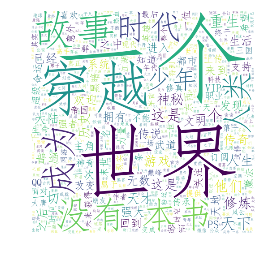

In [63]:
#I use the most frequent 50 "a", "an", and "ad" to make the cloud.

wc = wordcloud.WordCloud(background_color="white", 
                         max_words=500, 
                         width= 1000, 
                         height = 1000, 
                         font_path = "FangSong.ttf",  
                         mode ='RGBA', scale=.5).generate(' '.join(bookDF_male_tokenized["intro_clean"].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("whitehouse_word_cloud.pdf", format = 'pdf')


# Collocations

As illustrated above, we might want to find significant bigrams (two-word phrases), trigrams (three-word phrases), n-grams (*n*-word phrases) or skip-grams (noncontinguous 'phrases' with skip-length *n*). We will begin with the [`nltk.collocations.BigramCollocationFinder`](http://www.nltk.org/api/nltk.html?highlight=bigramcollocationfinder#nltk.collocations.BigramCollocationFinder) class, which can be given raw lists of strings with the `from_words()` method. By default it only looks at continuous bigrams but there is an option (`window_size`) to allow skip-grams.

In [92]:
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(whBigrams.N))

There are 2038 bigrams in the finder


To compare the bigrams we need to tell nltk what our score function is. Initially, we will look at the raw counts.

In [104]:
def bigramScoring(count, wordsTuple, total): #Question???
    return count

print(whBigrams.nbest(bigramScoring, 10))

[('rhode', 'island'), ('presid', 'bush'), ('sheldon', 'whitehous'), ('stem', 'cell'), ('whitehous', 'said'), ('bush', 'administr'), ('american', 'peopl'), ('bring', 'troop'), ('senat', 'sheldon'), ('troop', 'home')]


One note about how `BigramCollocationFinder` works. It doesn't use the strings internally.

In [98]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

whBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  3, The second word is: 28
The first word is:  1, The second word is: 13
The first word is:  3, The second word is: 1
The first word is:  2, The second word is: 6
The first word is:  2, The second word is: 3
The first word is:  2, The second word is: 1
The first word is:  6, The second word is: 3
The first word is:  3, The second word is: 4
The first word is:  2, The second word is: 5
The first word is:  1, The second word is: 8


The words are each given numeric IDs and there is a dictionary that maps the IDs to the words they represent. This is a common performance optimization.

Two words can appear together by chance. Recall from  Manning and Schütze's textbook that 

a t-value can be computed for each bigram to see how significant the association is. You may also want to try computing the $\chi^2$, likelihood ratio, and pointwise mutual information statistics. 

In [99]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('rhode', 'island'), 224.76276154889868),
 (('stem', 'cell'), 147.1648249386874),
 (('presid', 'bush'), 125.47926600452658),
 (('sheldon', 'whitehous'), 98.29568077429681),
 (('unit', 'state'), 63.97306762075195),
 (('whitehous', 'said'), 51.19795297754389),
 (('jack', 'reed'), 46.76922795684558),
 (('honor', 'societi'), 45.12225328800482),
 (('american', 'peopl'), 44.72619122625082),
 (('bring', 'troop'), 43.5219792630387),
 (('bush', 'administr'), 43.00500409579551),
 (('cell', 'research'), 41.45225953675993),
 (('youth', 'program'), 38.39213661791225),
 (('troop', 'home'), 37.10576499231786),
 (('come', 'home'), 36.81614397736382),
 (('senat', 'sheldon'), 36.316715861227216),
 (('epw', 'committe'), 34.53724147747711),
 (('potenti', 'close'), 33.8954225130405),
 (('budget', 'resolut'), 32.30875726842244),
 (('district', 'columbia'), 31.704344782000835),
 (('humpti', 'dumpti'), 31.704344782000835),
 (('jose', 'socrat'), 31.704344782000835),
 (('prime', 'minist'), 31.704344782000835)

There are a few other available measures

In [100]:
[s for s in dir(bigram_measures) if s[0] != '_']

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

We can also look at trigrams

In [101]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
whTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('bring', 'troop', 'home'), 2.4492137402176875),
 (('senat', 'sheldon', 'whitehous'), 2.4481687048628804),
 (('stem', 'cell', 'research'), 2.235928433348052),
 (('whitehous', 'said', 'today'), 1.998844332558715),
 (('jack', 'reed', 'sheldon'), 1.731997429576212),
 (('senat', 'youth', 'program'), 1.7319924253893992),
 (('unit', 'state', 'senat'), 1.7317472202355921),
 (('new', 'direct', 'iraq'), 1.7316771616202185),
 (('reed', 'sheldon', 'whitehous'), 1.7315170276422218),
 (('sheldon', 'whitehous', 'said'), 1.7309832477155662),
 (('trillion', 'foregon', 'surplus'), 1.4142094764716722),
 (('reconsid', 'potenti', 'close'), 1.4142067525373905),
 (('sent', 'clear', 'messag'), 1.4142059013079276),
 (('today', 'confirm', 'hear'), 1.41419824024276),
 (('select', 'committe', 'intellig'), 1.4141972187674043),
 (('gener', 'david', 'petraeu'), 1.4141931328659818),
 (('take', 'respons', 'secur'), 1.4141931328659818),
 (('cell', 'enhanc', 'act'), 1.414189046964559),
 (('respons', 'secur', 'govern'

Or n-grams (for any number n)

In [137]:
Ngrams = nltk.ngrams(whReleases['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('senat', 'jack', 'reed', 'sheldon'): 2, ('member', 'senat', 'select', 'committe'): 2, ('bring', 'troop', 'home', 'iraq'): 2, ('american', 'citizen', 'rhode', 'island'): 2, ('sheldon', 'whitehous', 'said', 'today'): 3, ('jack', 'reed', 'sheldon', 'whitehous'): 3, ('senat', 'select', 'committe', 'intellig'): 2, ('whitehous', 'welcom', 'rhode', 'island'): 2, ('portugues', 'american', 'citizen', 'rhode'): 2, ('senat', 'sheldon', 'whitehous', 'said'): 3, ('stem', 'cell', 'research', 'whitehous'): 2, ('take', 'respons', 'secur', 'govern'): 2, ('stem', 'cell', 'enhanc', 'act'): 2, ('begin', 'bring', 'troop', 'home'): 2}


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

In [3]:
bookDF_male_tokenized= pd.read_pickle("bookDF_male_tokenized.pickle")

In [31]:
"""lalalala"""



wf_bi = nltk.collocations.BigramCollocationFinder.from_words(bookDF_male_tokenized["intro_clean"].iloc[:100].sum())
print("There are {} bigrams in the finder".format(wf_bi.N))
bigram_measures = nltk.collocations.BigramAssocMeasures()
print("Bigram's t: \n", wf_bi.score_ngrams(bigram_measures.student_t)[:20])
#Only the first two bigrams have t higher than 2.576 and are statistically significant
print()

trigram_measures = nltk.collocations.TrigramAssocMeasures()
wf_tri = nltk.collocations.TrigramCollocationFinder.from_words(bookDF_male_tokenized["intro_clean"].iloc[:100].sum())
print("Trigram's t: \n", wf_tri.score_ngrams(trigram_measures.student_t)[:20])
#All the trigrams have t score lower than 2.576 and are not statistically significant
print()

#If trigrams are not significant, 4-gram and higher-oder-grams will not be. 
#Question???
Ngrams = nltk.ngrams(bookDF_male_tokenized["intro_clean"].iloc[:100].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print("If trigrams are not significant, these will not be: \n", Filtered)

#skipgrams
wf_sp = nltk.collocations.BigramCollocationFinder.from_words(bookDF_male_tokenized["intro_clean"].iloc[:100].sum(), window_size= 3)
bigram_measures = nltk.collocations.BigramAssocMeasures()
print("Skip-grams's t: \n", wf_sp.score_ngrams(bigram_measures.student_t)[:20])
#All the skip-grams have t score lower than 2.576 and are not statistically significant

There are 5074 bigrams in the finder
Bigram's t: 
 [(('这是', '一个'), 2.759862572845563), (('斗罗', '大陆'), 2.6353226500040283), (('公众', '号'), 2.4446622107713862), (('一代', '天骄'), 2.2321017552298845), (('李', '七夜'), 1.9980291683090263), (('凡人', '修仙'), 1.992905005912495), (('来到', '一个'), 1.9434371304690579), (('欲', '封天'), 1.7303440172579108), (('琴中', '帝王'), 1.7303440172579108), (('阴阳', '冕'), 1.7289785850091377), (('天域', '苍穹'), 1.7288647989884065), (('欢迎', '加入'), 1.7265890785737843), (('武魂', '觉醒'), 1.7245409302006245), (('普通', '少年'), 1.7211273495786914), (('VIP', '群'), 1.7202170614128425), (('成为', '一名'), 1.703376730344639), (('七', '柄'), 1.413656126991789), (('万族', '林立'), 1.413656126991789), (('两个', '时空'), 1.413656126991789), (('中文', '网上'), 1.413656126991789)]

Trigram's t: 
 [(('旷古绝今', '赤子', '琴心'), 1.4142133426508319), (('赤橙', '黄绿', '青蓝紫'), 1.4142133426508319), (('黄绿', '青蓝紫', '彩虹'), 1.4142133426508319), (('以往', '设定', '赤橙'), 1.4142132327897003), (('先河', '颠覆', '以往'), 1.4142132327897003), (('设定', '赤

In [4]:
test = nltk.text.ConcordanceIndex(bookDF_male_tokenized["intro_clean"].sum()) 
test.print_concordance("她") 

Displaying 5 of 5 matches:
 作者 公众 号 萧府 军团 魔前 叩 三千年 回首 凡尘 做 仙 只为 她 掌缘 生灭 请 耳根 求魔 故事 发生 一个 充满 战争 世界 晋元 大
 小女孩 喊 爸爸 杨轶 表示 懵 逼 曦 曦 百分之百 亲 女儿 孩子 她 妈 居然 高 冷绝 美的 过气 歌后 乐子 闹大咯 问题 接踵而至 哄娃
 故事 杨轶 没有 想到 他 搬运 过来 故事 火遍 全球 气 走 孩子 她 妈 追回来 经验 杨 轶 表示 没有 一首 情歌 解决不了 问题 两首 
活下去 小雷 语录 找 小姐 不肯 张开 双腿 绝对 长得 不够 帅 更 她 大姨妈 唯一 原因 可能 钱 不够 小雷 语录 之二 一陀 牛粪 利用 
秋 誓要 活出 一个 精彩 人生 家族 重视 科举 脸 生母 出身 低下 她 讨 诰命 堂上 明枪暗箭 无妨 无妨 张 良计 墙梯 伴君 当真 如伴 


In [5]:
#Stretch
#5 tokens window
def find_cloest_n_word(wordlist, n= 5):
    cloest_5_word= []
    for i in range(len(wordlist[:-5])):
        w_5= []
        for j in range(n):
            w_5+= [(wordlist[i], wordlist[i+j+1])]
        cloest_5_word+= w_5
    return cloest_5_word

some_text=[]
for i in range(5):
    some_text+= bookDF_male_tokenized["ch"+str(i+1)+"_clean"].sum()
cloest_5= find_cloest_n_word(some_text)

In [6]:
v1v2= ["他", "她"]
cloest_5_v1v2= [] #finding all the combination that involves 他 and 她
for w1, w2 in cloest_5:
    if (w1 in v1v2) or (w2 in v1v2):
        cloest_5_v1v2+= [(w1, w2)]
print(len(cloest_5_v1v2))

"""
cloest_5_f= [] #all the words that ever been grouped with 她
cloest_5_m= [] #all the words that ever been grouped with 他 
for w1, w2 in cloest_5_v1v2:
    if w1== "她":
        cloest_5_f+= [w2]
    elif w1== "他":
        cloest_5_m+= [w2]
    else:
        if w2== "她":
            cloest_5_f+= [w1]
        else:
            cloest_5_m+= [w1]
"""

#No need to see if the word is differentiating if it occurs rarely for both 他 and 她 (v1 & v2)    
def count_occurence(v1, v2, word_combi_list):
    #Input1= v. E.g., 他
    #Input2= v. E.g., 她
    #Input3= a list of word combination that contains 他 or 她. E.g., the cloest_5_v1v2 above
    
    #Output1= a dictionary for v1. words that occur next to v1 and their occurence
    #Output2= a dictionary for v2. words that occur next to v2 and their occurence
    
    v1_dic= {}
    v2_dic= {}
    for w1, w2 in word_combi_list:
        if w1== v1:
            if w2 not in v1_dic:
                v1_dic[w2]= 1
            else:
                v1_dic[w2]+= 1

        elif w1== v2:
            if w2 not in v2_dic:
                v2_dic[w2]= 1
            else:
                v2_dic[w2]+= 1

        else:
            if w2== v1:
                if w1 not in v1_dic:
                    v1_dic[w1]= 1
                else:
                    v1_dic[w1]+= 1           

            else:
                if w1 not in v2_dic:
                    v2_dic[w1]= 1
                else:
                    v2_dic[w1]+= 1
    return v1_dic, v2_dic
  
v1_dic, v2_dic= count_occurence("他", "她", cloest_5_v1v2)

516449


In [8]:
#For 她 and 他 remove the words that occur (next to it) less than 5 times
v1_keys= list(v1_dic.keys())
print(len(v1_keys))
v2_keys= list(v2_dic.keys())
print(len(v2_keys))

for k1 in v1_keys:
    if v1_dic[k1]< 5:
        del v1_dic[k1]
for k2 in v2_keys:
    if v2_dic[k2]< 5:
        del v2_dic[k2]

#Delete the words that cannot differentiate 她 and 他 
v1_keys1= list(v1_dic.keys())
print(len(v1_keys1))
v2_keys1= list(v2_dic.keys())
print(len(v2_keys1))
delete_keys= []
for key in v2_keys1:
    if key in v1_keys1:
        diff= v1_dic[key]- v2_dic[key]
        if abs(diff)< 3:
            del v1_dic[key]
            del v2_dic[key]
            delete_keys+= [key]

print(len(delete_keys))        

53141
17512


In [106]:
#Calculate the t-values for differentiating 他 and 她
compare_keys= list(v1_dic.keys())+ list(v2_dic.keys())
t_dic= {}
for k in compare_keys:
    if k not in v1_dic:
        t_dic[k]= [(0- v2_dic[k])/(0+ v2_dic[k])**(1/2)]
    elif k not in v2_dic:
        t_dic[k]= [(v1_dic[k]- 0)/(v1_dic[k]+ 0)**(1/2)]

klist= []
for k, v in t_dic.items():
    if abs(float(v[0]))> 2.576:
        #print(k, v)
        klist+= [k]

k_male= {}
k_female= {}
for k in klist:
    if k in v1_dic.keys() and k in v2_dic.keys():
        print(k, "他:", v1_dic[k], "她", v2_dic[k])
    elif k in v1_dic.keys():
        
        k_male[k]= v1_dic[k]
        #print(k, "他:", v1_dic[k])
    else:
        #print(k, "她", v2_dic[k])
        k_female[k]= v2_dic[k]
        

In [107]:
print(k_male) #Words associated with "he" but not "she"

{'稳定': 35, '骑兵': 11, '舍得': 18, '瞪眼': 9, '气海': 12, '燃烧': 23, '唾沫': 9, '走南闯北': 8, '镜头': 7, '林凡': 9, '两条': 19, '面相': 12, '手动': 11, '足以': 39, '圣器': 9, '暗想': 9, '人脉': 8, '法术': 25, '一模一样': 26, '阅历': 21, '学好': 11, '英语': 31, '大字': 9, '各地': 10, '请来': 16, '正站': 14, '美食家': 12, '万物': 11, '出个': 9, '如果说': 18, '不出': 23, '数字': 20, '刀锋': 10, '蚀文': 11, '黑人': 14, '发黑': 8, '这头': 25, '秦风': 49, '人要': 8, '前来': 21, '侥幸': 9, '蜂': 7, '那点': 24, '房里': 10, '最初': 31, '唏嘘': 8, '岁数': 9, '懒洋洋': 20, '冰凉': 26, '纹路': 9, '反感': 9, '韩萧': 26, '无礼': 9, '邹亮': 27, '飞剑': 16, '布满': 18, '二叔': 16, '好手': 8, '递': 9, '西瓜': 8, '遭遇': 47, '筋骨': 18, '老夫': 15, '评论': 9, '一脉': 8, '双目': 46, '告示': 8, '否决': 7, '防守': 13, '残留': 12, '压住': 9, '头痛': 27, '境': 16, '王鹏飞': 16, '道袍': 7, '品酒': 22, '史书': 9, '反': 18, '兴奋不已': 7, '满地': 10, '农村': 9, '初级': 16, '刘伟': 10, '身周': 7, '四下': 14, '人手': 7, '搞错': 10, '渗出': 13, '刺进': 8, '东北': 11, '射': 21, '出名': 9, '堵塞': 9, '敬': 9, '玄妙': 14, '孤僻': 12, '山岗': 8, '有心人': 7, '崩溃': 25, '震动': 17, '开除': 11, '过多': 11, '迎接': 21, '中年

In [108]:
print(k_female) #Words associated with "she" but not "he"

{'清纯': 7, '张桂梅': 7, '太皇太后': 8, '高挑': 8, '加藤': 12, '婀娜': 7, '怀孕': 12, '俏': 9, '姐妹': 13, '后母': 7, '亭亭玉立': 8, '汀': 7, 'zhan': 7, '凌家': 7, '白嫩': 7, '嫁人': 7, '南莲姐': 7, '泰妍': 7, '男朋友': 7, '绿裙': 11, '身姿': 7, '她家': 10, '瞧见': 8, '赵幽': 31, '秀发': 13, '叠阳手': 7, '女白领': 9, '很漂亮': 10, '娜塔莎': 17, '女巫': 9, '木牌': 7, '害羞': 8, '自卑': 7, '好意思': 7, '妩媚': 13, '克里斯': 8, '长裙': 14, '女王': 7, '墨镜': 8, '紫雪': 14, '仙子': 8, '衣裙': 7, '嫁': 8, '香子': 10, '罗梅': 8, '春儿': 8, '苏诗烟': 7, '杨玉环': 15, '婚姻': 9, '牛仔裤': 8, '橙': 11, '搞事': 7, '婆娘': 7, '红月': 7, '之门': 8, '陈操': 19, '永乐': 9, '陈婉': 8, '顶多': 7, '惠': 11, '林茵': 7, '撩拨': 7, '王柔花': 7, '关诺': 7, '出嫁': 12, '任性': 7}


# Distributional distances

If we want to compare different corpora, we need a distance or divergence that compares the two distributions.

We will use the: 

+ Kullback-Leibler (KL) divergence
+ $\chi^2$ divergence
+ Kolmogorov-Smirnov (KS) distance
+ Wasserstein distance

### Kullback-Leibler and $x^2$ divergences ###

KL and $\chi^2$ divergences are members of the broader <a "href=https://en.wikipedia.org/wiki/F-divergence" target="_blank">$f$-divergence</a> family, a function of $D_f (P || Q)$ that calculates the difference between two probability distributions P and Q. The KL $f(t)$ is $ t \text{ log } t $, while the $\chi^2$ is $t^2-1$. KL comes from information and $\chi^2$ from measure theory. As such, the KL divergence computes the relative entropy between two distributions--how they differ in bits, while the $\chi^2$ whether the same statistical inferences can be drawn from them both.  

Specifically, given two discrete probability distributions $P$ and $Q$, the Kullback-Leibler divergence from $Q$ to $P$ is defined as:

$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$.

The [scipy.stats.entropy()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) function does the calculation for you, which takes in two arrays of probabilities and computes the KL divergence. Note that the KL divergence is in general not commutative, i.e. $D_{\mathrm{KL}}(P\|Q) \neq D_{\mathrm{KL}}(Q\|P)$ .

Also note that the KL divernce is the sum of elementwise divergences. Scipy provides [scipy.special.kl_div()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kl_div.html#scipy-special-kl-div) which calculates elementwise divergences for you.

The $\chi^2$ Divergence is defined as:

$D_{\mathrm{\chi^2}}(P\|Q) = \sum_i \left(\frac{P(i)}{Q(i)}-1\right)^2$. 

This is also noncommutative, and the code can be drawn directly from scipy.

### Kolmogorov-Smirnov ###

The two-sample Kolmogovorov-Smirnov test statistic calculates the distance between the cumulative distribution function of the two distributions to be compared, and, along with the $x^2$ divergence, is among the most common approaches two calculating a distance in statistics. It can be interpreted as a test of whether two distributions are drawn from the same underlying distribution. As with the others, the code is readily available in scipy.

### Wasserstein Distance ###

When this is computed on a Euclidian metric structure (e.g., numbers of words), this is also known as the earth mover’s distance, because it can be seen as the minimum amount of "work" required to transform $P$ into $Q$, where "work" is measured as the amount of distribution weight that must be moved, multiplied by the distance it has to be moved.

### Computing ###

To do this we will need to create the arrays, lets compare the Whitehouse releases with the Kennedy releases. First we have to download them and load them into a DataFrame.

In [31]:
kenReleases = getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Kennedy', maxFiles = 10)
kenReleases[:5]

,download_url,html_url,name,path,text
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Apr2005Kennedy14.txt,raw/Kennedy/01Apr2005Kennedy14.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2005Kennedy12.txt,raw/Kennedy/01Aug2005Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy10.txt,raw/Kennedy/01Aug2006Kennedy10.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy11.txt,raw/Kennedy/01Aug2006Kennedy11.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy12.txt,raw/Kennedy/01Aug2006Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...


Then we can tokenize, stem and remove stop words, like we did for the Whitehouse press releases

In [36]:
kenReleases['tokenized_text'] = kenReleases['text'].apply(lambda x: nltk.word_tokenize(x))
kenReleases['normalized_tokens'] = kenReleases['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

Now we need to compare the two collection of words, remove those not found in both, and assign the remaining ones indices.

In [37]:
whWords = set(whReleases['normalized_tokens'].sum())
kenWords = set(kenReleases['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = whWords & kenWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['student']

205

Now we can count the occurrences of each word in the corpora and create our arrays. Note that we don't have to use numpy arrays as we do here. We could just use a list, but the arrays are faster in numpy so we encourage you to get in the habit of using them.

In [38]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

whProbArray = makeProbsArray(whReleases['normalized_tokens'], overlapWordsDict)
kenProbArray = makeProbsArray(kenReleases['normalized_tokens'], overlapWordsDict)
kenProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

1.0

We can now compute the KL divergence. Pay attention to the asymmetry. Use [the Jensen–Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence), which is the average KL divergence between each distribution and the average of both distributions (i.e., the midpoint), if you want symmetry.

In [39]:
wh_kenDivergence = scipy.stats.entropy(whProbArray, kenProbArray)
print (wh_kenDivergence)
ken_whDivergence = scipy.stats.entropy(kenProbArray, whProbArray)
print (ken_whDivergence)

0.6173213425299763
0.5853312201622387


Then, we can do the elementwise calculation and see which words best distinguish the two corpora.

In [40]:
wh_kenDivergence_ew = scipy.special.kl_div(whProbArray, kenProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = wh_kenDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,cancer,3.032435e-04
1,educ,7.773883e-03
2,also,5.158333e-03
3,packag,4.691851e-05
4,irrespons,6.588735e-05
5,august,4.691851e-05
6,high,9.481653e-08
7,statement,1.572934e-03
8,expand,2.062913e-03
9,may,6.722796e-04


In [41]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
47,iraq,0.088262
224,bush,0.043068
141,stem,0.022238
246,law,0.020677
315,protect,0.019480
264,american,0.018494
306,depart,0.017750
144,bring,0.014362
241,member,0.012655
319,war,0.011936


Now we will apply what we learned today to the Guternberg texts in nltk and see if we can detect patterns between them. 

First, let's transform every text into normalized tokens. Note that in this first step, no stopword is removed. 

In [42]:
fileids = nltk.corpus.gutenberg.fileids()
corpora = []
for fileid in fileids:
    words = nltk.corpus.gutenberg.words(fileid)
    normalized_tokens = normlizeTokens(words, stopwordLst = [], stemmer = snowball)
    corpora.append(normalized_tokens)

In [43]:
print(len(corpora))
print(len(corpora[0]))

18
161600


Then, let's separate the normalized tokens into stopwords and non-stopwords.

In [44]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    for word in corpus:
        if word in stop_words_nltk:
            s.append(word)
        else:
            nons.append(word)
    corpora_s.append(s)
    corpora_nons.append(nons)

Define some covenient funtions for calculating divergence and distances.

In [45]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

Now we will calculate the KL divergence for each pair of corpora, turn the results into a matrix, and visualize the matrix as a heatmap. Recall that $D_{\mathrm{KL}}(P\|Q)$ measures the amount of information loss when $Q$ is used to approximate $P$. Here, the rows are the $P$s used for calculating KL divergences, and the columns are the $Q$s. So, each cell measures the amount of information loss when the word distribution of the column text is used to approximate the word distribution of the row text. Because the KL divergence is directional, such that the divergence of $P$ from $Q$ is different from the same of $Q$ from $P$, the matrix is assymetric and contains unique information above and below the diagonal. The same is true for the $\chi^2$ divergence.

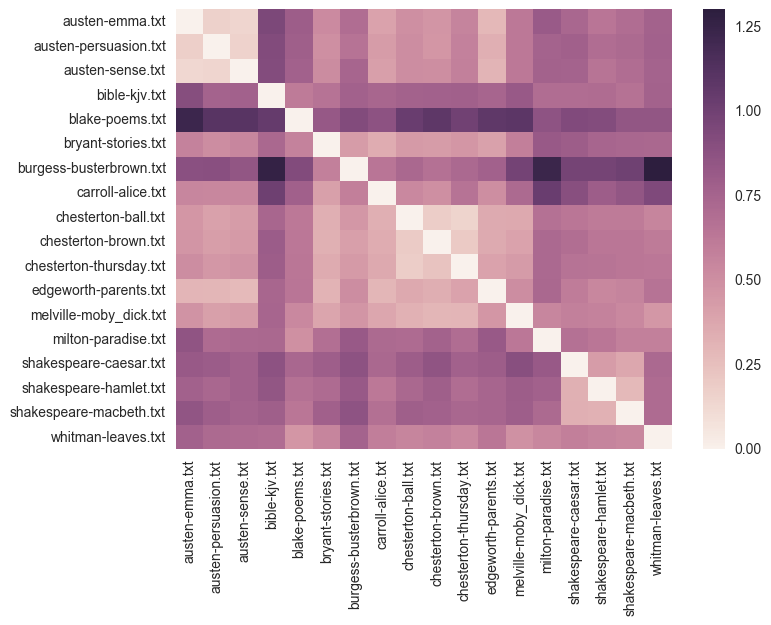

In [46]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Note that works by the same author have the lowest within-group KL divergences. 

To reveal more patterns, let's do a multidimensional scaling of the matrix.

//anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


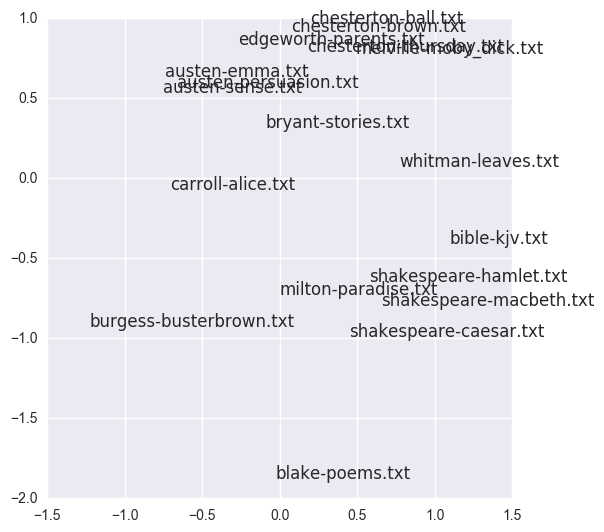

In [47]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

Do you see any patterns in the image shown above? Does it make sense?

We may just want to focus on the distrbution of stopwords or non-stopwords. Let's do the analysis again first for stopwords and then for non-stopwords.

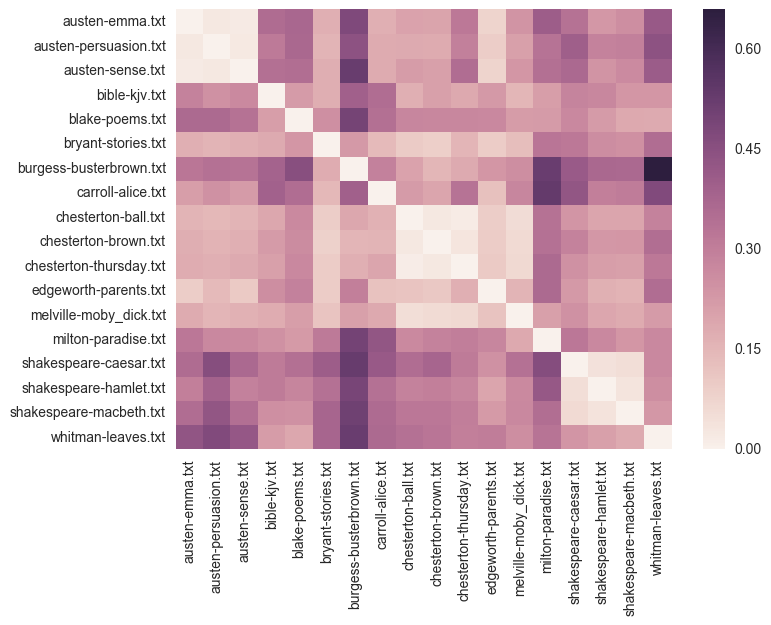

In [48]:
L = []
for p in corpora_s:
    l = []
    for q in corpora_s:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

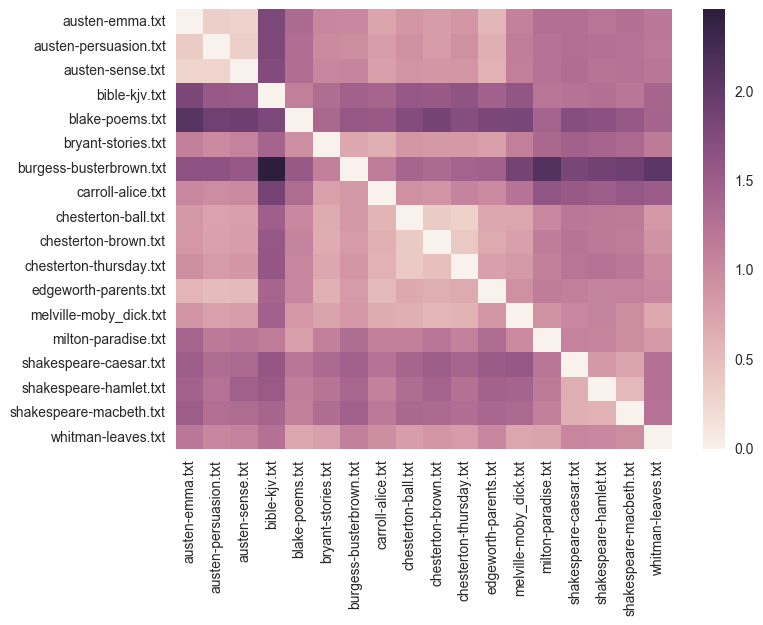

In [49]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Now we compute the same for the assymmetric $\chi^2$ Divergence.

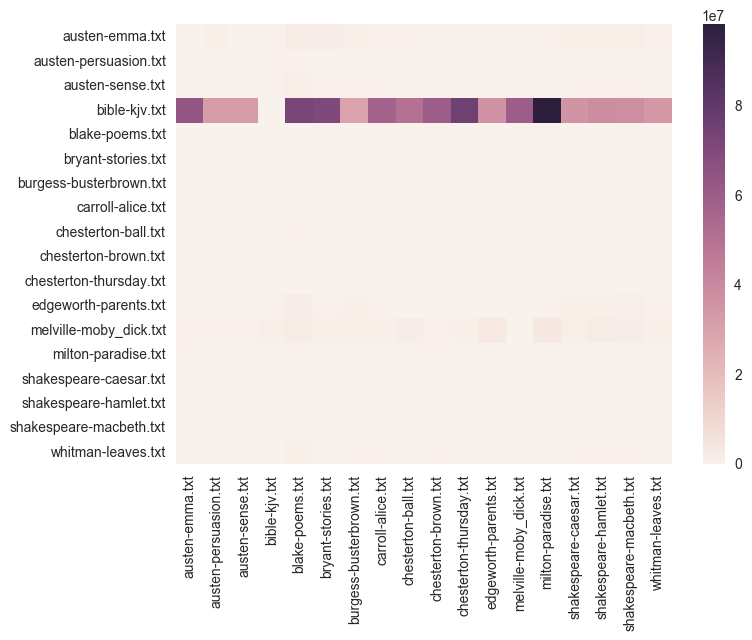

In [50]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

For the KS distance:

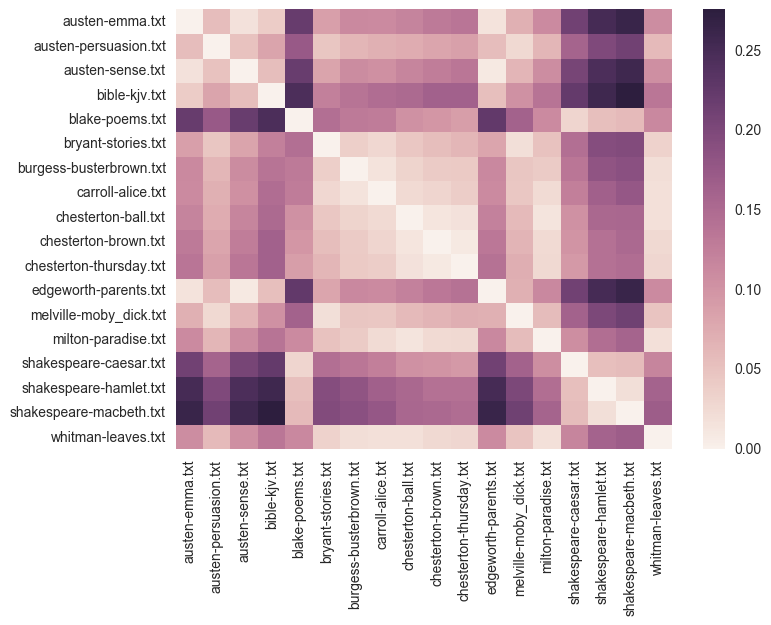

In [51]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

And finally for the Wasserstein or "earth mover's" Distance.

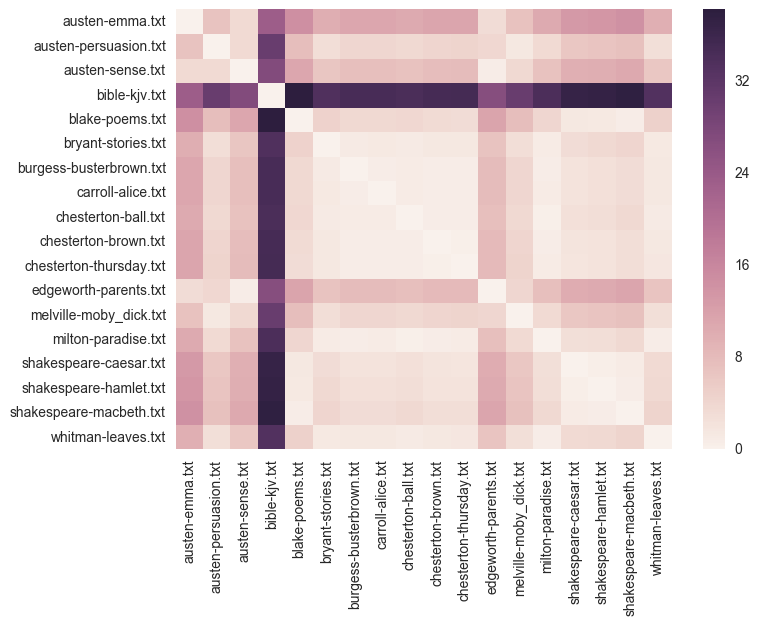

In [52]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

You can see that the Bible is highly divergent and this makes reading the plot somewhat difficult. Let's fix this by taking the log of each cell, which will reduce the distance of the Bible from other texts as an outlier.

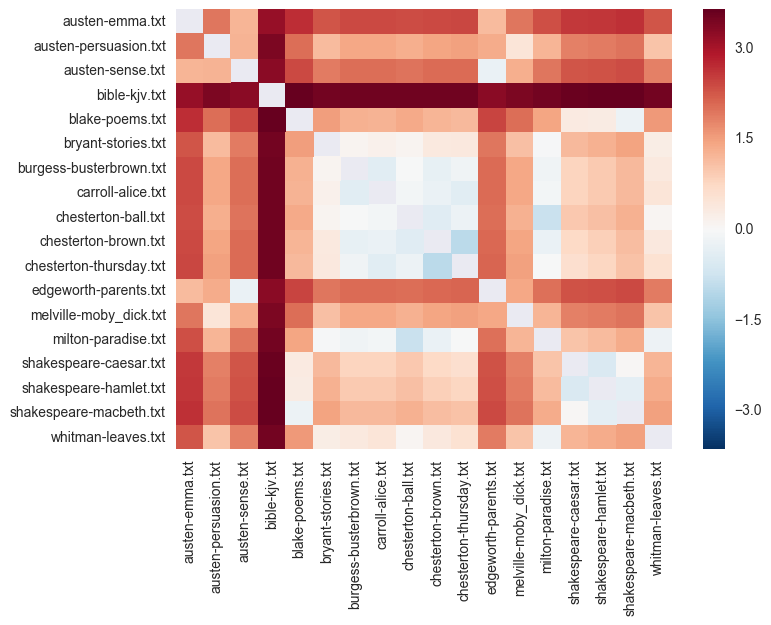

In [53]:
ax = sns.heatmap(div.apply(np.log).replace([np.inf, -np.inf], np.nan))
plt.show()

This is more legible, as it continues to show that the Bible is divergent, but other structure is also visible, such as the divergence of Austen's *Emma* and *Sense and Sensibility*, and Edgeworth's *The Parent's Assistant*. 

If we want to rerun this on a new data set of our own composition, we can be a bit more efficient with our coding. Let's use the Shakespeare texts from last week as example: 

In [54]:
shakespeare_df = lucem_illud.loadTextDirectory('../data/Shakespeare')

Now we stem and remove stopwords

In [55]:
shakespeare_df['tokenized_text'] = shakespeare_df['text'].apply(lambda x: nltk.word_tokenize(x))
shakespeare_df['normalized_tokens'] = shakespeare_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

Create the corpus file and generate the heatmap:

In [100]:
len(corpora_sp)

10

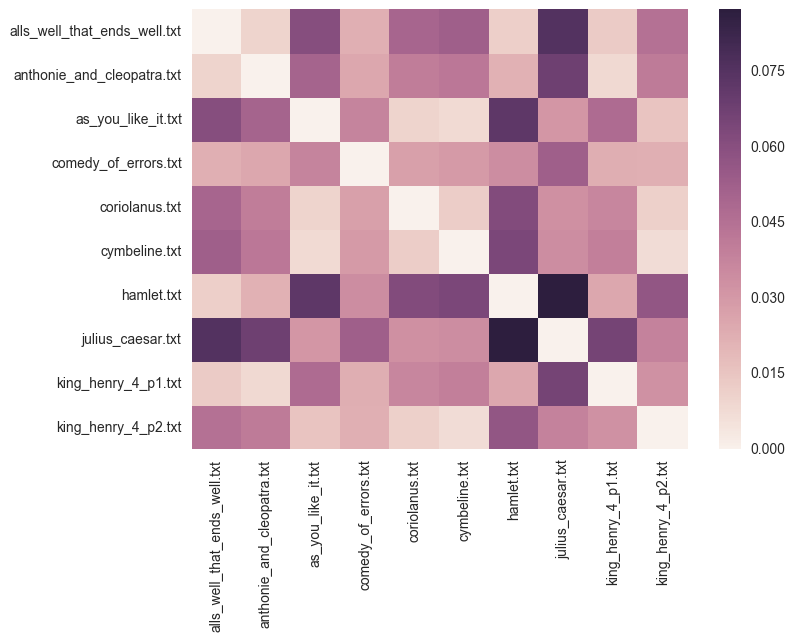

In [56]:
measure = 'KS' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 10 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(shakespeare_df[:num_of_texts].index)
corpora_sp = list(shakespeare_df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

What are "The Passionate Pilgrim" and "The Phoenix and the Turtle"? Little known poems by Shakespeare that are unsurprisingly hard to classify, as they are so different from everything else he wrote.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

In [58]:
bookDF_male_tokenized= pd.read_pickle("bookDF_male_tokenized.pickle")

In [59]:
tag_list= []
for b_tag in bookDF_male_tokenized["tags"]:
    tag= b_tag.split(";")
    print(tag)
    tag_list+= tag[:-1]

['仙侠', '幻想修仙', '']
['玄幻', '东方玄幻', '']
['仙侠', '幻想修仙', '']
['玄幻', '异世大陆', '']
['仙侠', '幻想修仙', '']
['都市', '异术超能', '二次元', '']
['玄幻', '异世大陆', '']
['仙侠', '古典仙侠', '']
['玄幻', '异世大陆', '']
['玄幻', '异世大陆', '']
['玄幻', '东方玄幻', '']
['玄幻', '东方玄幻', '']
['奇幻', '现代魔法', '']
['都市', '都市生活', '']
['仙侠', '修真文明', '']
['奇幻', '剑与魔法', '']
['奇幻', '史诗奇幻', '二次元', '']
['玄幻', '异世大陆', '']
['玄幻', '异世大陆', '']
['仙侠', '幻想修仙', '']
['仙侠', '幻想修仙', '']
['游戏', '虚拟网游', '']
['都市', '异术超能', '']
['仙侠', '修真文明', '']
['灵异', '寻墓探险', '']
['玄幻', '东方玄幻', '']
['玄幻', '异世大陆', '']
['仙侠', '修真文明', '']
['玄幻', '异世大陆', '']
['玄幻', '异世大陆', '']
['仙侠', '修真文明', '']
['都市', '异术超能', '']
['都市', '异术超能', '']
['科幻', '未来世界', '']
['武侠', '武侠幻想', '']
['奇幻', '现代魔法', '']
['都市', '都市生活', '']
['玄幻', '东方玄幻', '']
['都市', '都市生活', '']
['都市', '都市生活', '']
['都市', '都市生活', '二次元', '']
['仙侠', '幻想修仙', '']
['仙侠', '现代修真', '']
['玄幻', '异世大陆', '']
['玄幻', '东方玄幻', '']
['玄幻', '东方玄幻', '']
['玄幻', '东方玄幻', '']
['仙侠', '修真文明', '']
['玄幻', '东方玄幻', '']
['科幻', '时空穿梭', '二次元', '']
['历史', '架空历史', '']
['历

In [66]:
#I categorize the novels based on their first tag
def find_first_tag(wordlist):
    return wordlist.split(";")[0]
bookDF_male_tokenized["first_tag"]= bookDF_male_tokenized["tags"].apply(lambda x: find_first_tag(x))
tag_set= set(bookDF_male_tokenized["first_tag"])

{'灵异', '都市', '现实', '武侠', '体育', '奇幻', '军事', '玄幻', '游戏', '二次元', '科幻', '仙侠', '历史'}


In [77]:
#I use the first chapter of each book for this exercise
lingyi= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '灵异']
print("lingyi", len(lingyi))
dushi= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '都市']
print("dushi", len(dushi))
xianshi= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '现实']
print("xianshi", len(xianshi))
wuxia= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '武侠']
print("wuxia", len(wuxia))
tiyu= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '体育']
print("tiyu", len(tiyu))
qihuan= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '奇幻']
print("qihuan", len(qihuan))
junshi= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '军事']
print("junshi", len(junshi))
youxi= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '游戏']
print("youxi", len(youxi))
erciyuan= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '二次元']
print("erciyuan", len(erciyuan))
kehuan= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '科幻']
print("kehuan", len(kehuan))
xianxia= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '仙侠']
print("xianxia", len(xianxia))
lishi= bookDF_male_tokenized.loc[bookDF_male_tokenized['first_tag'] == '历史']
print("lishi", len(lishi))

#I will select dushi, kehuan, youxi, xianxia, and lishi for this exercise

lingyi 6
dushi 97
xianshi 4
wuxia 7
tiyu 4
qihuan 12
junshi 1
youxi 37
erciyuan 6
kehuan 49
xianxia 79
lishi 74


In [96]:
#Creat a wordlist for each category
def sum_words(bookDF):
    sumed_words= []
    for i in range(bookDF.shape[0]):
        book_words= []
        for j in range(30):
            book_words+= bookDF.iloc[i]["ch"+str(j+1)+"_clean"]
        sumed_words+= book_words
    return sumed_words
dushi_wordlist= sum_words(dushi)
kehuan_wordlist= sum_words(kehuan) 
youxi_wordlist= sum_words(youxi)
xianxia_wordlist= sum_words(xianxia)
lishi_wordlist= sum_words(lishi)
corpora_5_category= [dushi_wordlist, kehuan_wordlist,
                     youxi_wordlist, xianxia_wordlist,
                     lishi_wordlist] 

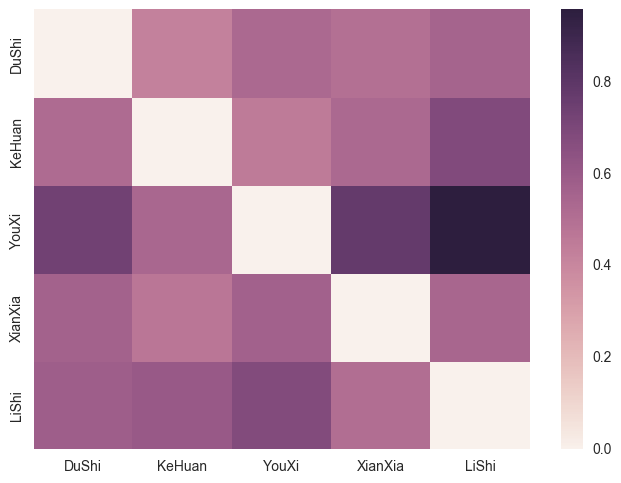

In [109]:
L = []
for p in corpora_5_category:
    l = []
    for q in corpora_5_category:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = ["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"], 
                       index = ["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"])
ax = sns.heatmap(div)
plt.show()

//anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


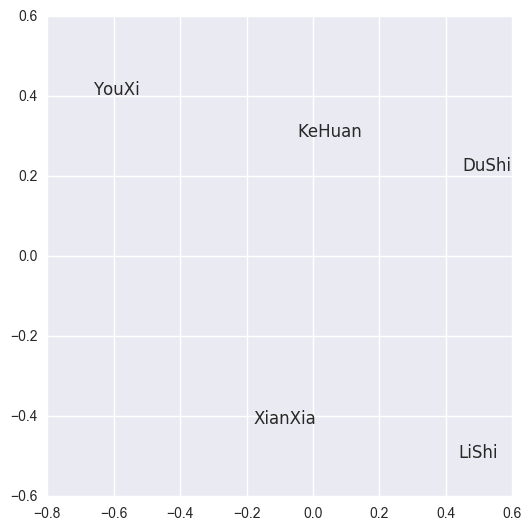

In [111]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"]):
    ax.annotate(txt, (x[i],y[i]))

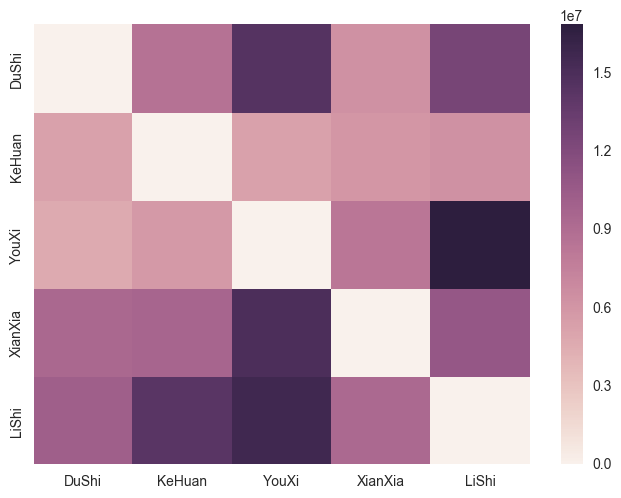

In [112]:
L = []
for p in corpora_5_category:
    l = []
    for q in corpora_5_category:
        l.append(Divergence(p,q, difference = 'Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = ["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"], 
                       index = ["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"])
ax = sns.heatmap(div)
plt.show()

//anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


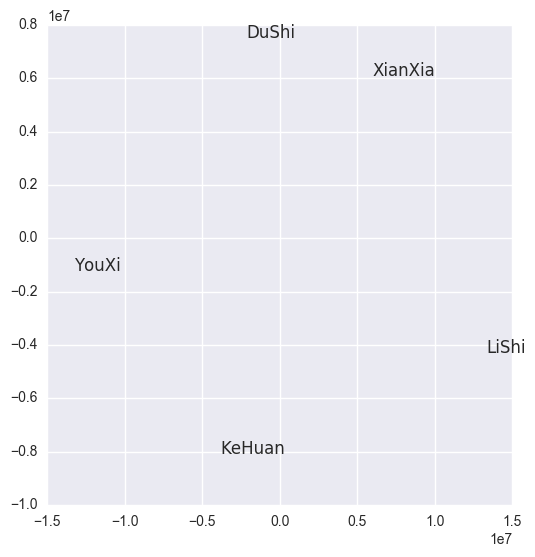

In [113]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"]):
    ax.annotate(txt, (x[i],y[i]))

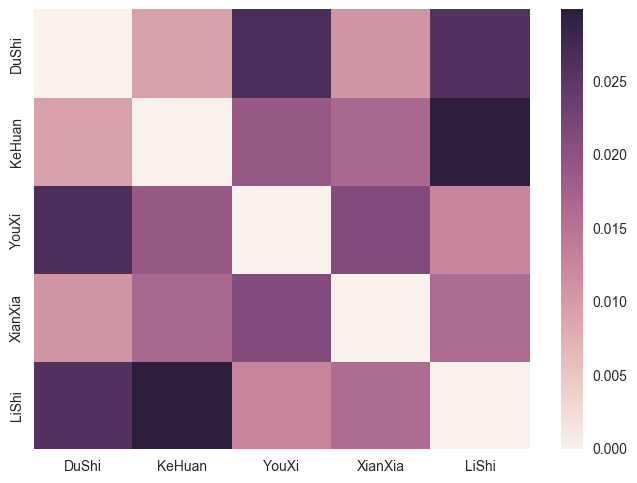

In [114]:
L = []
for p in corpora_5_category:
    l = []
    for q in corpora_5_category:
        l.append(Divergence(p,q, difference = 'KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = ["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"], 
                       index = ["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"])
ax = sns.heatmap(div)
plt.show()

//anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


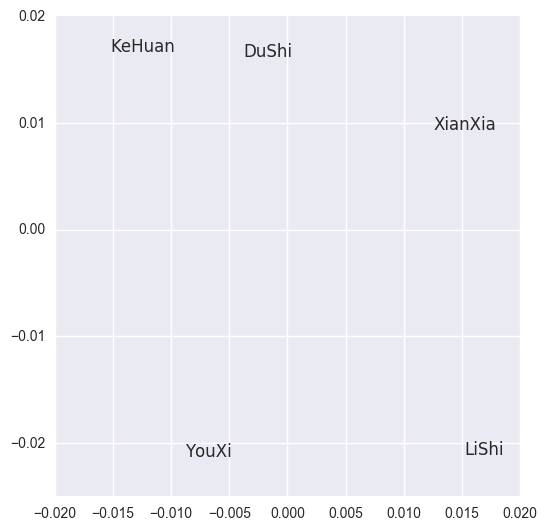

In [115]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"]):
    ax.annotate(txt, (x[i],y[i]))

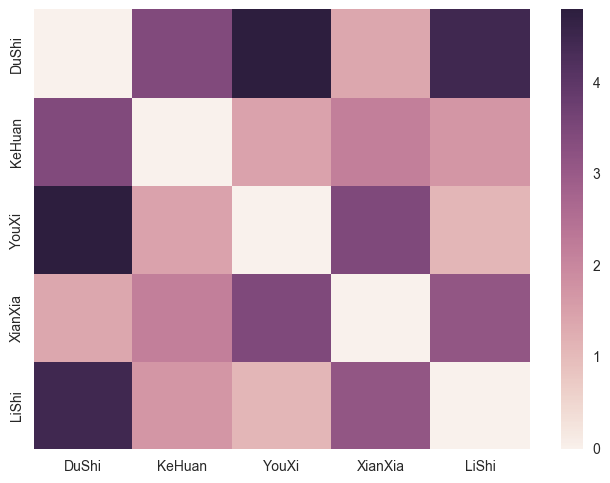

In [116]:
L = []
for p in corpora_5_category:
    l = []
    for q in corpora_5_category:
        l.append(Divergence(p,q, difference = 'Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = ["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"], 
                       index = ["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"])
ax = sns.heatmap(div)
plt.show()

//anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


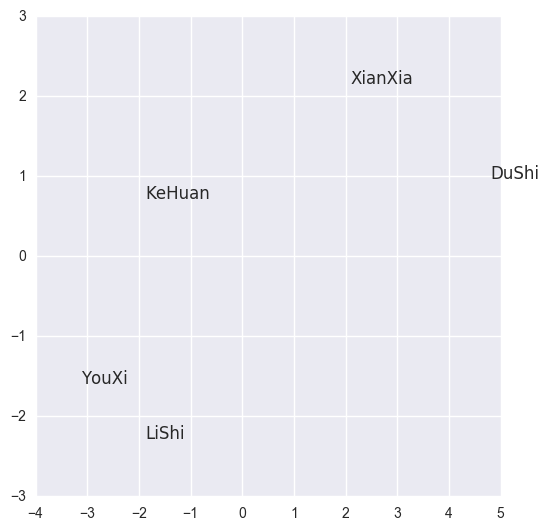

In [117]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(["DuShi", "KeHuan", "YouXi", "XianXia", "LiShi"]):
    ax.annotate(txt, (x[i],y[i]))

In [ ]:
"""Shiyu's comments: 
I think both "KL" and "chi2" differentiate the 5 categories okay.
The colors indicating divergence are in general darker. 
Also the multi-dimensional scaling plot shows that the 5 categories are more spread out.
showing that it is probably easier to differentiate the 5 categories with KL or Chi2."""